GAN、WGAN、WGAN-GP

In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import random

In [2]:
m = loadmat("./points1.mat")

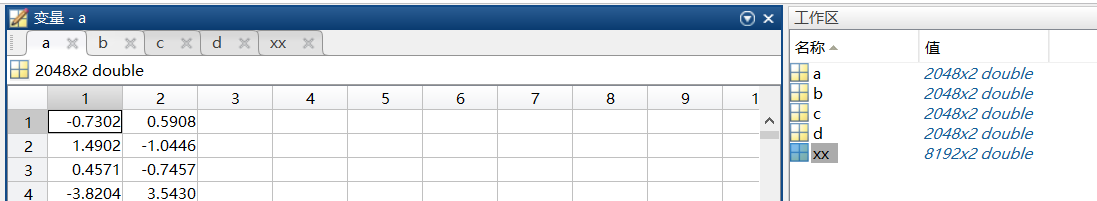

In [3]:
data_xx = m['xx']

In [4]:
print(data_xx.shape)

(8192, 2)


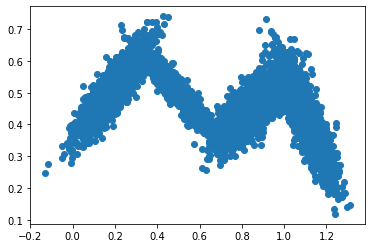

In [5]:
# data_xx散点图
plt.scatter(data_xx[:,0],data_xx[:,1])

In [6]:
np.random.shuffle(data_xx)

In [7]:
train_set_rate = 0.8 # 设置训练集占训练集和验证集的比例
size = int(train_set_rate * len(data_xx))
train_set = data_xx[:size]
valid_set = data_xx[size:]

In [8]:
print('训练集大小：',len(train_set))
print('验证集大小：',len(valid_set))

训练集大小： 6553
验证集大小： 1639


---
--------------------------------------WGAN--------------------------------------
---
---

In [9]:
# 生成器
class generator(nn.Module):
    def __init__(self):
        super(generator, self).__init__()
        self.generator_model = nn.Sequential(
            nn.Linear(INPUT_SIZE, 256),
            nn.ReLU(True),
            nn.Linear(256, 256),
            nn.ReLU(True),
            nn.Linear(256, 2)
        )
 
    def forward(self, x):
        x = self.generator_model(x)
        return x

In [10]:
# 判别器
class discriminator(nn.Module):
    def __init__(self):
        super(discriminator, self).__init__()
        # 两层线性全连接
        self.discriminator_model = nn.Sequential(
            nn.Linear(2, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1)
        )
 
    def forward(self, x):
        x = self.discriminator_model(x)
        return x

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
INPUT_SIZE = 10 # 生成器输入的噪声维度
LR = 0.0001
D = discriminator().to(device)
G = generator().to(device)

In [12]:
d_optimizer = torch.optim.RMSprop(D.parameters(), lr=LR)
g_optimizer = torch.optim.RMSprop(G.parameters(), lr=LR)

In [13]:
D # 由两个输入(x,y)预测该点为T/F

discriminator(
  (discriminator_model): Sequential(
    (0): Linear(in_features=2, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=256, out_features=1, bias=True)
  )
)

In [14]:
G # 由噪声输入预测样本(x，y) 

generator(
  (generator_model): Sequential(
    (0): Linear(in_features=10, out_features=256, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=256, out_features=2, bias=True)
  )
)

-----
模型训练
--
---

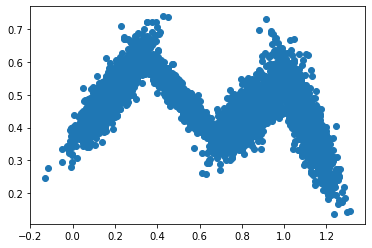

In [15]:
# train_set散点图
plt.scatter(train_set[:,0],train_set[:,1])

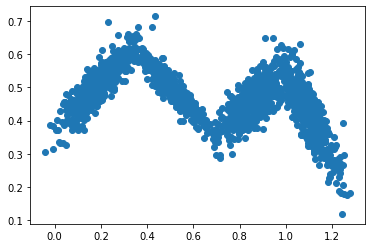

In [16]:
# valid_set散点图
plt.scatter(valid_set[:,0],valid_set[:,1])

In [17]:
import draw
def test_G():
    G_input = torch.randn(2000, INPUT_SIZE).to(device)
    G_out = G(G_input)
    G_data = np.array(G_out.cpu().data)

    x_min = -1
    x_max = 2
    y_min = 0
    y_max = 1
    # 画背景
    cb = draw.draw_background(D, x_min, x_max, y_min, y_max)
    # 画出测试集的点分布和生成器输出的点分布
    draw.draw_scatter(valid_set, 'b', x_min, x_max, y_min, y_max)
    draw.draw_scatter(G_data, 'r', x_min, x_max, y_min, y_max)
    return cb

In [18]:
epoch_num = 200
batch_size = 128

In [19]:
BATCH_SIZE = batch_size

In [20]:
CLAMP = 0.1

In [21]:
g_loss_list = []
d_loss_list = []

epoch: 1 	 batch: 1 		 d_loss: 0.01884671 	 g_loss: 0.08818263 
epoch: 1 	 batch: 2 		 d_loss: -0.05328313 	 g_loss: 0.01760639 
epoch: 1 	 batch: 3 		 d_loss: -0.07190897 	 g_loss: 0.02040575 
epoch: 1 	 batch: 4 		 d_loss: -0.07677734 	 g_loss: 0.01251254 
epoch: 1 	 batch: 5 		 d_loss: -0.06901325 	 g_loss: -0.00433381 
epoch: 1 	 batch: 6 		 d_loss: -0.05695516 	 g_loss: -0.02319491 
epoch: 1 	 batch: 7 		 d_loss: -0.03740895 	 g_loss: -0.04621688 
epoch: 1 	 batch: 8 		 d_loss: -0.01254950 	 g_loss: -0.07598123 
epoch: 1 	 batch: 9 		 d_loss: 0.01906795 	 g_loss: -0.10459547 
epoch: 1 	 batch: 10 		 d_loss: 0.04800893 	 g_loss: -0.13565066 
epoch: 1 	 batch: 11 		 d_loss: 0.06297624 	 g_loss: -0.14116156 
epoch: 1 	 batch: 12 		 d_loss: 0.07202842 	 g_loss: -0.14853367 
epoch: 1 	 batch: 13 		 d_loss: 0.07686357 	 g_loss: -0.14210603 
epoch: 1 	 batch: 14 		 d_loss: 0.06588305 	 g_loss: -0.12655874 
epoch: 1 	 batch: 15 		 d_loss: 0.06177570 	 g_loss: -0.11259829 
epoch: 1 	 batch

epoch: 4 	 batch: 7 		 d_loss: -0.00402544 	 g_loss: 0.08323292 
epoch: 4 	 batch: 8 		 d_loss: -0.00075816 	 g_loss: 0.08202358 
epoch: 4 	 batch: 9 		 d_loss: 0.00174057 	 g_loss: 0.07563449 
epoch: 4 	 batch: 10 		 d_loss: 0.01109986 	 g_loss: 0.07142977 
epoch: 4 	 batch: 11 		 d_loss: 0.00852158 	 g_loss: 0.06341918 
epoch: 4 	 batch: 12 		 d_loss: 0.01859370 	 g_loss: 0.05891089 
epoch: 4 	 batch: 13 		 d_loss: 0.01731725 	 g_loss: 0.04902608 
epoch: 4 	 batch: 14 		 d_loss: 0.03225315 	 g_loss: 0.04342801 
epoch: 4 	 batch: 15 		 d_loss: 0.02518111 	 g_loss: 0.03967192 
epoch: 4 	 batch: 16 		 d_loss: 0.02374156 	 g_loss: 0.03427368 
epoch: 4 	 batch: 17 		 d_loss: 0.02698636 	 g_loss: 0.02903870 
epoch: 4 	 batch: 18 		 d_loss: 0.02099232 	 g_loss: 0.02741217 
epoch: 4 	 batch: 19 		 d_loss: 0.01457770 	 g_loss: 0.02533087 
epoch: 4 	 batch: 20 		 d_loss: 0.01371847 	 g_loss: 0.02309401 
epoch: 4 	 batch: 21 		 d_loss: 0.00685359 	 g_loss: 0.02156455 
epoch: 4 	 batch: 22 		 d_

epoch: 6 	 batch: 36 		 d_loss: 0.01049323 	 g_loss: 0.02527289 
epoch: 6 	 batch: 37 		 d_loss: 0.00877428 	 g_loss: 0.02361675 
epoch: 6 	 batch: 38 		 d_loss: 0.00043275 	 g_loss: 0.02149925 
epoch: 6 	 batch: 39 		 d_loss: -0.00604224 	 g_loss: 0.01945743 
epoch: 6 	 batch: 40 		 d_loss: -0.01245790 	 g_loss: 0.01747060 
epoch: 6 	 batch: 41 		 d_loss: -0.01746159 	 g_loss: 0.01523649 
epoch: 6 	 batch: 42 		 d_loss: -0.02459309 	 g_loss: 0.01250807 
epoch: 6 	 batch: 43 		 d_loss: -0.02603214 	 g_loss: 0.00843618 
epoch: 6 	 batch: 44 		 d_loss: -0.02939151 	 g_loss: 0.00490468 
epoch: 6 	 batch: 45 		 d_loss: -0.03303105 	 g_loss: -0.00210785 
epoch: 6 	 batch: 46 		 d_loss: -0.03097696 	 g_loss: -0.00881881 
epoch: 6 	 batch: 47 		 d_loss: -0.03469598 	 g_loss: -0.01453838 
epoch: 6 	 batch: 48 		 d_loss: -0.03290934 	 g_loss: -0.02293442 
epoch: 6 	 batch: 49 		 d_loss: -0.02189595 	 g_loss: -0.03307138 
epoch: 6 	 batch: 50 		 d_loss: -0.01448903 	 g_loss: -0.04394869 
epoch: 

epoch: 9 	 batch: 42 		 d_loss: -0.02116384 	 g_loss: 0.07087734 
epoch: 9 	 batch: 43 		 d_loss: -0.02169504 	 g_loss: 0.07616265 
epoch: 9 	 batch: 44 		 d_loss: -0.02310905 	 g_loss: 0.08281044 
epoch: 9 	 batch: 45 		 d_loss: -0.02379368 	 g_loss: 0.09393577 
epoch: 9 	 batch: 46 		 d_loss: -0.02165091 	 g_loss: 0.09499261 
epoch: 9 	 batch: 47 		 d_loss: -0.01740576 	 g_loss: 0.09827235 
epoch: 9 	 batch: 48 		 d_loss: -0.01537441 	 g_loss: 0.09935558 
epoch: 9 	 batch: 49 		 d_loss: -0.02157090 	 g_loss: 0.10095351 
epoch: 9 	 batch: 50 		 d_loss: -0.01780299 	 g_loss: 0.10058893 
epoch: 9 	 batch: 51 		 d_loss: -0.00773338 	 g_loss: 0.09916176 
epoch: 10 	 batch: 1 		 d_loss: -0.00503480 	 g_loss: 0.09648288 
epoch: 10 	 batch: 2 		 d_loss: -0.00697940 	 g_loss: 0.09236961 
epoch: 10 	 batch: 3 		 d_loss: -0.00289366 	 g_loss: 0.08874317 
epoch: 10 	 batch: 4 		 d_loss: 0.00220771 	 g_loss: 0.08469892 
epoch: 10 	 batch: 5 		 d_loss: 0.00715553 	 g_loss: 0.07874986 
epoch: 10 	 

epoch: 12 	 batch: 23 		 d_loss: -0.01460916 	 g_loss: 0.11262880 
epoch: 12 	 batch: 24 		 d_loss: -0.00493112 	 g_loss: 0.10729983 
epoch: 12 	 batch: 25 		 d_loss: -0.01100404 	 g_loss: 0.10552299 
epoch: 12 	 batch: 26 		 d_loss: -0.00392557 	 g_loss: 0.10425595 
epoch: 12 	 batch: 27 		 d_loss: 0.00012281 	 g_loss: 0.09608521 
epoch: 12 	 batch: 28 		 d_loss: 0.00392799 	 g_loss: 0.09363861 
epoch: 12 	 batch: 29 		 d_loss: 0.01138381 	 g_loss: 0.08611349 
epoch: 12 	 batch: 30 		 d_loss: 0.01827251 	 g_loss: 0.07747039 
epoch: 12 	 batch: 31 		 d_loss: 0.02431949 	 g_loss: 0.06870268 
epoch: 12 	 batch: 32 		 d_loss: 0.02167886 	 g_loss: 0.06424750 
epoch: 12 	 batch: 33 		 d_loss: 0.02247274 	 g_loss: 0.05763181 
epoch: 12 	 batch: 34 		 d_loss: 0.02957295 	 g_loss: 0.05150273 
epoch: 12 	 batch: 35 		 d_loss: 0.03537805 	 g_loss: 0.04662970 
epoch: 12 	 batch: 36 		 d_loss: 0.02616222 	 g_loss: 0.04098118 
epoch: 12 	 batch: 37 		 d_loss: 0.03180330 	 g_loss: 0.03659738 
epoch:

epoch: 15 	 batch: 20 		 d_loss: -0.00555944 	 g_loss: 0.02668449 
epoch: 15 	 batch: 21 		 d_loss: -0.01399107 	 g_loss: 0.02273721 
epoch: 15 	 batch: 22 		 d_loss: -0.02148555 	 g_loss: 0.01914907 
epoch: 15 	 batch: 23 		 d_loss: -0.02806135 	 g_loss: 0.01559386 
epoch: 15 	 batch: 24 		 d_loss: -0.03608393 	 g_loss: 0.01134224 
epoch: 15 	 batch: 25 		 d_loss: -0.03790745 	 g_loss: 0.00646699 
epoch: 15 	 batch: 26 		 d_loss: -0.04440947 	 g_loss: -0.00032350 
epoch: 15 	 batch: 27 		 d_loss: -0.04417395 	 g_loss: -0.00712187 
epoch: 15 	 batch: 28 		 d_loss: -0.04476887 	 g_loss: -0.01605298 
epoch: 15 	 batch: 29 		 d_loss: -0.04622309 	 g_loss: -0.02248013 
epoch: 15 	 batch: 30 		 d_loss: -0.03666899 	 g_loss: -0.03755739 
epoch: 15 	 batch: 31 		 d_loss: -0.03000823 	 g_loss: -0.04833901 
epoch: 15 	 batch: 32 		 d_loss: -0.02030631 	 g_loss: -0.05551515 
epoch: 15 	 batch: 33 		 d_loss: -0.00541488 	 g_loss: -0.06623086 
epoch: 15 	 batch: 34 		 d_loss: -0.00256494 	 g_loss:

epoch: 17 	 batch: 47 		 d_loss: 0.01413285 	 g_loss: 0.04070723 
epoch: 17 	 batch: 48 		 d_loss: 0.01014279 	 g_loss: 0.03611154 
epoch: 17 	 batch: 49 		 d_loss: 0.00297949 	 g_loss: 0.03196067 
epoch: 17 	 batch: 50 		 d_loss: -0.00160361 	 g_loss: 0.02823354 
epoch: 17 	 batch: 51 		 d_loss: -0.00794869 	 g_loss: 0.02483032 
epoch: 18 	 batch: 1 		 d_loss: -0.01537956 	 g_loss: 0.02086803 
epoch: 18 	 batch: 2 		 d_loss: -0.01985044 	 g_loss: 0.01650771 
epoch: 18 	 batch: 3 		 d_loss: -0.02613013 	 g_loss: 0.01341943 
epoch: 18 	 batch: 4 		 d_loss: -0.03224626 	 g_loss: 0.00958214 
epoch: 18 	 batch: 5 		 d_loss: -0.03526733 	 g_loss: 0.00381975 
epoch: 18 	 batch: 6 		 d_loss: -0.04310971 	 g_loss: -0.00149949 
epoch: 18 	 batch: 7 		 d_loss: -0.04317570 	 g_loss: -0.01159538 
epoch: 18 	 batch: 8 		 d_loss: -0.04253621 	 g_loss: -0.02112780 
epoch: 18 	 batch: 9 		 d_loss: -0.03811929 	 g_loss: -0.02838180 
epoch: 18 	 batch: 10 		 d_loss: -0.03884361 	 g_loss: -0.03886346 
ep

epoch: 20 	 batch: 48 		 d_loss: 0.04548640 	 g_loss: -0.11842976 
epoch: 20 	 batch: 49 		 d_loss: 0.05398905 	 g_loss: -0.11354882 
epoch: 20 	 batch: 50 		 d_loss: 0.05028325 	 g_loss: -0.10308577 
epoch: 20 	 batch: 51 		 d_loss: 0.04149254 	 g_loss: -0.09248524 
epoch: 21 	 batch: 1 		 d_loss: 0.03700744 	 g_loss: -0.07945681 
epoch: 21 	 batch: 2 		 d_loss: 0.03457266 	 g_loss: -0.06354862 
epoch: 21 	 batch: 3 		 d_loss: 0.02749391 	 g_loss: -0.04709544 
epoch: 21 	 batch: 4 		 d_loss: 0.01974820 	 g_loss: -0.02966680 
epoch: 21 	 batch: 5 		 d_loss: 0.01211594 	 g_loss: -0.01153661 
epoch: 21 	 batch: 6 		 d_loss: 0.00252470 	 g_loss: 0.00634590 
epoch: 21 	 batch: 7 		 d_loss: -0.00226538 	 g_loss: 0.02075114 
epoch: 21 	 batch: 8 		 d_loss: -0.00553077 	 g_loss: 0.03437574 
epoch: 21 	 batch: 9 		 d_loss: -0.01020911 	 g_loss: 0.04633125 
epoch: 21 	 batch: 10 		 d_loss: -0.01180515 	 g_loss: 0.05710487 
epoch: 21 	 batch: 11 		 d_loss: -0.01760589 	 g_loss: 0.06704617 
epoch

epoch: 23 	 batch: 35 		 d_loss: 0.00696145 	 g_loss: 0.00111432 
epoch: 23 	 batch: 36 		 d_loss: 0.00256112 	 g_loss: 0.01546973 
epoch: 23 	 batch: 37 		 d_loss: -0.00512537 	 g_loss: 0.03247736 
epoch: 23 	 batch: 38 		 d_loss: -0.00683320 	 g_loss: 0.04244867 
epoch: 23 	 batch: 39 		 d_loss: -0.00847252 	 g_loss: 0.05277598 
epoch: 23 	 batch: 40 		 d_loss: -0.01478740 	 g_loss: 0.06347673 
epoch: 23 	 batch: 41 		 d_loss: -0.01728365 	 g_loss: 0.07487066 
epoch: 23 	 batch: 42 		 d_loss: -0.01566429 	 g_loss: 0.08230301 
epoch: 23 	 batch: 43 		 d_loss: -0.02048575 	 g_loss: 0.09014155 
epoch: 23 	 batch: 44 		 d_loss: -0.02253421 	 g_loss: 0.09712627 
epoch: 23 	 batch: 45 		 d_loss: -0.01464697 	 g_loss: 0.10024379 
epoch: 23 	 batch: 46 		 d_loss: -0.01581053 	 g_loss: 0.10304739 
epoch: 23 	 batch: 47 		 d_loss: -0.01411855 	 g_loss: 0.10807958 
epoch: 23 	 batch: 48 		 d_loss: -0.00723841 	 g_loss: 0.10438272 
epoch: 23 	 batch: 49 		 d_loss: -0.01423439 	 g_loss: 0.1062351

epoch: 26 	 batch: 21 		 d_loss: -0.01210634 	 g_loss: 0.08639491 
epoch: 26 	 batch: 22 		 d_loss: -0.01435582 	 g_loss: 0.09112628 
epoch: 26 	 batch: 23 		 d_loss: -0.01711843 	 g_loss: 0.09701844 
epoch: 26 	 batch: 24 		 d_loss: -0.01116507 	 g_loss: 0.09786168 
epoch: 26 	 batch: 25 		 d_loss: -0.01417554 	 g_loss: 0.09892198 
epoch: 26 	 batch: 26 		 d_loss: -0.00977829 	 g_loss: 0.10096471 
epoch: 26 	 batch: 27 		 d_loss: -0.01296329 	 g_loss: 0.10226418 
epoch: 26 	 batch: 28 		 d_loss: -0.00913893 	 g_loss: 0.10258181 
epoch: 26 	 batch: 29 		 d_loss: -0.00643367 	 g_loss: 0.10127580 
epoch: 26 	 batch: 30 		 d_loss: -0.00336509 	 g_loss: 0.09923959 
epoch: 26 	 batch: 31 		 d_loss: -0.00282584 	 g_loss: 0.09743951 
epoch: 26 	 batch: 32 		 d_loss: -0.00488696 	 g_loss: 0.09574474 
epoch: 26 	 batch: 33 		 d_loss: -0.00491231 	 g_loss: 0.09305467 
epoch: 26 	 batch: 34 		 d_loss: 0.00216515 	 g_loss: 0.09051234 
epoch: 26 	 batch: 35 		 d_loss: 0.01003767 	 g_loss: 0.0900437

epoch: 29 	 batch: 15 		 d_loss: 0.01010297 	 g_loss: 0.08654462 
epoch: 29 	 batch: 16 		 d_loss: 0.01008583 	 g_loss: 0.08045172 
epoch: 29 	 batch: 17 		 d_loss: 0.01706114 	 g_loss: 0.07480791 
epoch: 29 	 batch: 18 		 d_loss: 0.01907282 	 g_loss: 0.06793687 
epoch: 29 	 batch: 19 		 d_loss: 0.01570580 	 g_loss: 0.06388641 
epoch: 29 	 batch: 20 		 d_loss: 0.02083092 	 g_loss: 0.05872357 
epoch: 29 	 batch: 21 		 d_loss: 0.02055167 	 g_loss: 0.05235257 
epoch: 29 	 batch: 22 		 d_loss: 0.01452533 	 g_loss: 0.04873615 
epoch: 29 	 batch: 23 		 d_loss: 0.01029215 	 g_loss: 0.04456740 
epoch: 29 	 batch: 24 		 d_loss: 0.00886950 	 g_loss: 0.03811946 
epoch: 29 	 batch: 25 		 d_loss: 0.00062104 	 g_loss: 0.03473329 
epoch: 29 	 batch: 26 		 d_loss: -0.00297676 	 g_loss: 0.02961385 
epoch: 29 	 batch: 27 		 d_loss: -0.01004547 	 g_loss: 0.02557458 
epoch: 29 	 batch: 28 		 d_loss: -0.01768064 	 g_loss: 0.02171819 
epoch: 29 	 batch: 29 		 d_loss: -0.02604606 	 g_loss: 0.01775032 
epoch:

epoch: 32 	 batch: 3 		 d_loss: 0.01466752 	 g_loss: 0.04577434 
epoch: 32 	 batch: 4 		 d_loss: 0.01354156 	 g_loss: 0.04012924 
epoch: 32 	 batch: 5 		 d_loss: 0.00800012 	 g_loss: 0.03542860 
epoch: 32 	 batch: 6 		 d_loss: 0.00135554 	 g_loss: 0.03101255 
epoch: 32 	 batch: 7 		 d_loss: -0.00705433 	 g_loss: 0.02692314 
epoch: 32 	 batch: 8 		 d_loss: -0.01485665 	 g_loss: 0.02253699 
epoch: 32 	 batch: 9 		 d_loss: -0.02206408 	 g_loss: 0.01886835 
epoch: 32 	 batch: 10 		 d_loss: -0.03358368 	 g_loss: 0.01408993 
epoch: 32 	 batch: 11 		 d_loss: -0.03602839 	 g_loss: 0.00980607 
epoch: 32 	 batch: 12 		 d_loss: -0.04625964 	 g_loss: 0.00445382 
epoch: 32 	 batch: 13 		 d_loss: -0.04370804 	 g_loss: -0.00102342 
epoch: 32 	 batch: 14 		 d_loss: -0.06147210 	 g_loss: -0.00626845 
epoch: 32 	 batch: 15 		 d_loss: -0.05777695 	 g_loss: -0.01341115 
epoch: 32 	 batch: 16 		 d_loss: -0.04483886 	 g_loss: -0.02965645 
epoch: 32 	 batch: 17 		 d_loss: -0.05153065 	 g_loss: -0.03466594 
e

epoch: 35 	 batch: 12 		 d_loss: 0.03545425 	 g_loss: -0.06772260 
epoch: 35 	 batch: 13 		 d_loss: 0.03333729 	 g_loss: -0.04965631 
epoch: 35 	 batch: 14 		 d_loss: 0.01688321 	 g_loss: -0.03028907 
epoch: 35 	 batch: 15 		 d_loss: 0.01606155 	 g_loss: -0.01654646 
epoch: 35 	 batch: 16 		 d_loss: 0.01066447 	 g_loss: 0.00016275 
epoch: 35 	 batch: 17 		 d_loss: 0.00208154 	 g_loss: 0.01766558 
epoch: 35 	 batch: 18 		 d_loss: -0.00224081 	 g_loss: 0.03105385 
epoch: 35 	 batch: 19 		 d_loss: -0.00478513 	 g_loss: 0.04256570 
epoch: 35 	 batch: 20 		 d_loss: -0.00644383 	 g_loss: 0.05466668 
epoch: 35 	 batch: 21 		 d_loss: -0.00942129 	 g_loss: 0.06414152 
epoch: 35 	 batch: 22 		 d_loss: -0.01290636 	 g_loss: 0.07332893 
epoch: 35 	 batch: 23 		 d_loss: -0.01254814 	 g_loss: 0.07827403 
epoch: 35 	 batch: 24 		 d_loss: -0.01185931 	 g_loss: 0.08515101 
epoch: 35 	 batch: 25 		 d_loss: -0.01535698 	 g_loss: 0.08938824 
epoch: 35 	 batch: 26 		 d_loss: -0.01314613 	 g_loss: 0.0950086

epoch: 38 	 batch: 2 		 d_loss: -0.00841599 	 g_loss: 0.06348460 
epoch: 38 	 batch: 3 		 d_loss: -0.01181034 	 g_loss: 0.07310621 
epoch: 38 	 batch: 4 		 d_loss: -0.01244449 	 g_loss: 0.08186108 
epoch: 38 	 batch: 5 		 d_loss: -0.01506047 	 g_loss: 0.08964783 
epoch: 38 	 batch: 6 		 d_loss: -0.01467704 	 g_loss: 0.09784192 
epoch: 38 	 batch: 7 		 d_loss: -0.01378840 	 g_loss: 0.10172332 
epoch: 38 	 batch: 8 		 d_loss: -0.00986670 	 g_loss: 0.10489810 
epoch: 38 	 batch: 9 		 d_loss: -0.01394768 	 g_loss: 0.10749106 
epoch: 38 	 batch: 10 		 d_loss: -0.00902633 	 g_loss: 0.10916325 
epoch: 38 	 batch: 11 		 d_loss: -0.01746806 	 g_loss: 0.11053359 
epoch: 38 	 batch: 12 		 d_loss: -0.00891798 	 g_loss: 0.11157095 
epoch: 38 	 batch: 13 		 d_loss: -0.01992426 	 g_loss: 0.11297642 
epoch: 38 	 batch: 14 		 d_loss: -0.00624171 	 g_loss: 0.11416849 
epoch: 38 	 batch: 15 		 d_loss: -0.00884327 	 g_loss: 0.11082745 
epoch: 38 	 batch: 16 		 d_loss: -0.01135989 	 g_loss: 0.10883015 
epo

epoch: 40 	 batch: 24 		 d_loss: 0.01777761 	 g_loss: -0.02317152 
epoch: 40 	 batch: 25 		 d_loss: 0.01512946 	 g_loss: -0.00942360 
epoch: 40 	 batch: 26 		 d_loss: 0.00874511 	 g_loss: 0.00561351 
epoch: 40 	 batch: 27 		 d_loss: 0.00500200 	 g_loss: 0.01758781 
epoch: 40 	 batch: 28 		 d_loss: -0.00039729 	 g_loss: 0.03160803 
epoch: 40 	 batch: 29 		 d_loss: -0.00343891 	 g_loss: 0.04203277 
epoch: 40 	 batch: 30 		 d_loss: -0.00614706 	 g_loss: 0.05259951 
epoch: 40 	 batch: 31 		 d_loss: -0.00753167 	 g_loss: 0.06045685 
epoch: 40 	 batch: 32 		 d_loss: -0.01174503 	 g_loss: 0.06964324 
epoch: 40 	 batch: 33 		 d_loss: -0.01486733 	 g_loss: 0.07775512 
epoch: 40 	 batch: 34 		 d_loss: -0.01668664 	 g_loss: 0.08819646 
epoch: 40 	 batch: 35 		 d_loss: -0.01195651 	 g_loss: 0.09462523 
epoch: 40 	 batch: 36 		 d_loss: -0.02033611 	 g_loss: 0.10005913 
epoch: 40 	 batch: 37 		 d_loss: -0.00945173 	 g_loss: 0.10593830 
epoch: 40 	 batch: 38 		 d_loss: -0.01580523 	 g_loss: 0.1074039

epoch: 42 	 batch: 51 		 d_loss: 0.02361317 	 g_loss: -0.03239647 
epoch: 43 	 batch: 1 		 d_loss: 0.01768540 	 g_loss: -0.01700415 
epoch: 43 	 batch: 2 		 d_loss: 0.01420052 	 g_loss: -0.00250220 
epoch: 43 	 batch: 3 		 d_loss: 0.00822426 	 g_loss: 0.01241466 
epoch: 43 	 batch: 4 		 d_loss: 0.00439507 	 g_loss: 0.02625739 
epoch: 43 	 batch: 5 		 d_loss: -0.00096319 	 g_loss: 0.03981840 
epoch: 43 	 batch: 6 		 d_loss: -0.00534931 	 g_loss: 0.05209406 
epoch: 43 	 batch: 7 		 d_loss: -0.00674031 	 g_loss: 0.06096140 
epoch: 43 	 batch: 8 		 d_loss: -0.00627067 	 g_loss: 0.06963080 
epoch: 43 	 batch: 9 		 d_loss: -0.01031237 	 g_loss: 0.07714024 
epoch: 43 	 batch: 10 		 d_loss: -0.01093350 	 g_loss: 0.08543010 
epoch: 43 	 batch: 11 		 d_loss: -0.01736642 	 g_loss: 0.09104231 
epoch: 43 	 batch: 12 		 d_loss: -0.01313638 	 g_loss: 0.09822037 
epoch: 43 	 batch: 13 		 d_loss: -0.02150686 	 g_loss: 0.10313981 
epoch: 43 	 batch: 14 		 d_loss: -0.01423647 	 g_loss: 0.11115609 
epoch:

epoch: 45 	 batch: 23 		 d_loss: 0.05081237 	 g_loss: -0.08845051 
epoch: 45 	 batch: 24 		 d_loss: 0.04604419 	 g_loss: -0.08008772 
epoch: 45 	 batch: 25 		 d_loss: 0.04847297 	 g_loss: -0.07049331 
epoch: 45 	 batch: 26 		 d_loss: 0.03805915 	 g_loss: -0.05378119 
epoch: 45 	 batch: 27 		 d_loss: 0.03193280 	 g_loss: -0.03730419 
epoch: 45 	 batch: 28 		 d_loss: 0.02317006 	 g_loss: -0.01919901 
epoch: 45 	 batch: 29 		 d_loss: 0.01606012 	 g_loss: -0.00310059 
epoch: 45 	 batch: 30 		 d_loss: 0.00911730 	 g_loss: 0.01384644 
epoch: 45 	 batch: 31 		 d_loss: 0.00498874 	 g_loss: 0.02754673 
epoch: 45 	 batch: 32 		 d_loss: -0.00123452 	 g_loss: 0.04196921 
epoch: 45 	 batch: 33 		 d_loss: -0.00559390 	 g_loss: 0.05458214 
epoch: 45 	 batch: 34 		 d_loss: -0.01045244 	 g_loss: 0.06874542 
epoch: 45 	 batch: 35 		 d_loss: -0.00980091 	 g_loss: 0.07954904 
epoch: 45 	 batch: 36 		 d_loss: -0.01754414 	 g_loss: 0.08925453 
epoch: 45 	 batch: 37 		 d_loss: -0.01211426 	 g_loss: 0.0997339

epoch: 47 	 batch: 45 		 d_loss: 0.04327495 	 g_loss: -0.04614769 
epoch: 47 	 batch: 46 		 d_loss: 0.04004022 	 g_loss: -0.03280178 
epoch: 47 	 batch: 47 		 d_loss: 0.02931974 	 g_loss: -0.01583781 
epoch: 47 	 batch: 48 		 d_loss: 0.02226389 	 g_loss: 0.00071971 
epoch: 47 	 batch: 49 		 d_loss: 0.01644171 	 g_loss: 0.01727870 
epoch: 47 	 batch: 50 		 d_loss: 0.00799535 	 g_loss: 0.03380929 
epoch: 47 	 batch: 51 		 d_loss: 0.00305564 	 g_loss: 0.04843391 
epoch: 48 	 batch: 1 		 d_loss: -0.00178406 	 g_loss: 0.06178604 
epoch: 48 	 batch: 2 		 d_loss: -0.00735500 	 g_loss: 0.07402499 
epoch: 48 	 batch: 3 		 d_loss: -0.01289475 	 g_loss: 0.08740896 
epoch: 48 	 batch: 4 		 d_loss: -0.01443090 	 g_loss: 0.09861049 
epoch: 48 	 batch: 5 		 d_loss: -0.01839136 	 g_loss: 0.10873267 
epoch: 48 	 batch: 6 		 d_loss: -0.01895929 	 g_loss: 0.11921120 
epoch: 48 	 batch: 7 		 d_loss: -0.01931529 	 g_loss: 0.12566319 
epoch: 48 	 batch: 8 		 d_loss: -0.01935178 	 g_loss: 0.13306236 
epoch: 

epoch: 50 	 batch: 15 		 d_loss: 0.05223956 	 g_loss: -0.08401540 
epoch: 50 	 batch: 16 		 d_loss: 0.05850454 	 g_loss: -0.07971533 
epoch: 50 	 batch: 17 		 d_loss: 0.05261946 	 g_loss: -0.07080610 
epoch: 50 	 batch: 18 		 d_loss: 0.04780187 	 g_loss: -0.05700929 
epoch: 50 	 batch: 19 		 d_loss: 0.04589674 	 g_loss: -0.04307775 
epoch: 50 	 batch: 20 		 d_loss: 0.03173736 	 g_loss: -0.02442648 
epoch: 50 	 batch: 21 		 d_loss: 0.02206732 	 g_loss: -0.00695382 
epoch: 50 	 batch: 22 		 d_loss: 0.01746243 	 g_loss: 0.00781018 
epoch: 50 	 batch: 23 		 d_loss: 0.01114727 	 g_loss: 0.02383744 
epoch: 50 	 batch: 24 		 d_loss: 0.00533433 	 g_loss: 0.03813654 
epoch: 50 	 batch: 25 		 d_loss: -0.00140439 	 g_loss: 0.05269220 
epoch: 50 	 batch: 26 		 d_loss: -0.00622017 	 g_loss: 0.06794730 
epoch: 50 	 batch: 27 		 d_loss: -0.01117061 	 g_loss: 0.07955596 
epoch: 50 	 batch: 28 		 d_loss: -0.01495436 	 g_loss: 0.09233490 
epoch: 50 	 batch: 29 		 d_loss: -0.01716272 	 g_loss: 0.10233413

epoch: 53 	 batch: 4 		 d_loss: -0.03041677 	 g_loss: 0.16032884 
epoch: 53 	 batch: 5 		 d_loss: -0.03186054 	 g_loss: 0.16464370 
epoch: 53 	 batch: 6 		 d_loss: -0.02407504 	 g_loss: 0.16900897 
epoch: 53 	 batch: 7 		 d_loss: -0.01725032 	 g_loss: 0.16547713 
epoch: 53 	 batch: 8 		 d_loss: -0.00972335 	 g_loss: 0.16181871 
epoch: 53 	 batch: 9 		 d_loss: -0.00815119 	 g_loss: 0.15554079 
epoch: 53 	 batch: 10 		 d_loss: 0.00400756 	 g_loss: 0.14858672 
epoch: 53 	 batch: 11 		 d_loss: 0.00026376 	 g_loss: 0.13882795 
epoch: 53 	 batch: 12 		 d_loss: 0.01671343 	 g_loss: 0.12995295 
epoch: 53 	 batch: 13 		 d_loss: 0.00851412 	 g_loss: 0.12238903 
epoch: 53 	 batch: 14 		 d_loss: 0.03244061 	 g_loss: 0.11058018 
epoch: 53 	 batch: 15 		 d_loss: 0.03182610 	 g_loss: 0.09842137 
epoch: 53 	 batch: 16 		 d_loss: 0.02915026 	 g_loss: 0.09111159 
epoch: 53 	 batch: 17 		 d_loss: 0.03615683 	 g_loss: 0.08169575 
epoch: 53 	 batch: 18 		 d_loss: 0.03454097 	 g_loss: 0.07470182 
epoch: 53 

epoch: 56 	 batch: 1 		 d_loss: -0.04818628 	 g_loss: 0.03128407 
epoch: 56 	 batch: 2 		 d_loss: -0.03822339 	 g_loss: 0.01943527 
epoch: 56 	 batch: 3 		 d_loss: -0.03768833 	 g_loss: 0.01358609 
epoch: 56 	 batch: 4 		 d_loss: -0.03546061 	 g_loss: 0.00556712 
epoch: 56 	 batch: 5 		 d_loss: -0.03146378 	 g_loss: -0.00085690 
epoch: 56 	 batch: 6 		 d_loss: -0.03762807 	 g_loss: -0.00646146 
epoch: 56 	 batch: 7 		 d_loss: -0.03004394 	 g_loss: -0.01707000 
epoch: 56 	 batch: 8 		 d_loss: -0.02383183 	 g_loss: -0.02801718 
epoch: 56 	 batch: 9 		 d_loss: -0.01107263 	 g_loss: -0.03576083 
epoch: 56 	 batch: 10 		 d_loss: -0.00555301 	 g_loss: -0.04885532 
epoch: 56 	 batch: 11 		 d_loss: 0.01889778 	 g_loss: -0.05883577 
epoch: 56 	 batch: 12 		 d_loss: 0.02071418 	 g_loss: -0.06595722 
epoch: 56 	 batch: 13 		 d_loss: 0.04433468 	 g_loss: -0.07356966 
epoch: 56 	 batch: 14 		 d_loss: 0.03542766 	 g_loss: -0.07549970 
epoch: 56 	 batch: 15 		 d_loss: 0.05228836 	 g_loss: -0.07712029

epoch: 58 	 batch: 42 		 d_loss: 0.01733441 	 g_loss: 0.01985892 
epoch: 58 	 batch: 43 		 d_loss: 0.01148682 	 g_loss: 0.03614811 
epoch: 58 	 batch: 44 		 d_loss: 0.00514041 	 g_loss: 0.05127250 
epoch: 58 	 batch: 45 		 d_loss: -0.00084198 	 g_loss: 0.06668967 
epoch: 58 	 batch: 46 		 d_loss: -0.00727903 	 g_loss: 0.08009738 
epoch: 58 	 batch: 47 		 d_loss: -0.00986299 	 g_loss: 0.09230395 
epoch: 58 	 batch: 48 		 d_loss: -0.01338040 	 g_loss: 0.10348318 
epoch: 58 	 batch: 49 		 d_loss: -0.01988075 	 g_loss: 0.11376686 
epoch: 58 	 batch: 50 		 d_loss: -0.02322871 	 g_loss: 0.12451701 
epoch: 58 	 batch: 51 		 d_loss: -0.02186322 	 g_loss: 0.13461834 
epoch: 59 	 batch: 1 		 d_loss: -0.02307674 	 g_loss: 0.14178917 
epoch: 59 	 batch: 2 		 d_loss: -0.03008262 	 g_loss: 0.14909264 
epoch: 59 	 batch: 3 		 d_loss: -0.03149137 	 g_loss: 0.15593755 
epoch: 59 	 batch: 4 		 d_loss: -0.03146058 	 g_loss: 0.16228370 
epoch: 59 	 batch: 5 		 d_loss: -0.03304332 	 g_loss: 0.16686317 
epo

epoch: 61 	 batch: 25 		 d_loss: -0.03547376 	 g_loss: 0.16740121 
epoch: 61 	 batch: 26 		 d_loss: -0.02799569 	 g_loss: 0.17116545 
epoch: 61 	 batch: 27 		 d_loss: -0.03140482 	 g_loss: 0.17340174 
epoch: 61 	 batch: 28 		 d_loss: -0.02561971 	 g_loss: 0.17284729 
epoch: 61 	 batch: 29 		 d_loss: -0.02132722 	 g_loss: 0.17098241 
epoch: 61 	 batch: 30 		 d_loss: -0.01371965 	 g_loss: 0.16483702 
epoch: 61 	 batch: 31 		 d_loss: -0.00843621 	 g_loss: 0.15881705 
epoch: 61 	 batch: 32 		 d_loss: -0.00499698 	 g_loss: 0.14924021 
epoch: 61 	 batch: 33 		 d_loss: 0.00122192 	 g_loss: 0.13671309 
epoch: 61 	 batch: 34 		 d_loss: 0.01528545 	 g_loss: 0.12673675 
epoch: 61 	 batch: 35 		 d_loss: 0.03040081 	 g_loss: 0.11674302 
epoch: 61 	 batch: 36 		 d_loss: 0.02693879 	 g_loss: 0.10474087 
epoch: 61 	 batch: 37 		 d_loss: 0.05000553 	 g_loss: 0.09112630 
epoch: 61 	 batch: 38 		 d_loss: 0.03801197 	 g_loss: 0.08459561 
epoch: 61 	 batch: 39 		 d_loss: 0.04088659 	 g_loss: 0.07481335 
ep

epoch: 63 	 batch: 46 		 d_loss: -0.03183418 	 g_loss: 0.18283676 
epoch: 63 	 batch: 47 		 d_loss: -0.02137705 	 g_loss: 0.18003106 
epoch: 63 	 batch: 48 		 d_loss: -0.01294455 	 g_loss: 0.17320296 
epoch: 63 	 batch: 49 		 d_loss: -0.01297164 	 g_loss: 0.16393676 
epoch: 63 	 batch: 50 		 d_loss: -0.00769686 	 g_loss: 0.15808398 
epoch: 63 	 batch: 51 		 d_loss: 0.00914741 	 g_loss: 0.14834526 
epoch: 64 	 batch: 1 		 d_loss: 0.01865614 	 g_loss: 0.13537964 
epoch: 64 	 batch: 2 		 d_loss: 0.02116925 	 g_loss: 0.12137362 
epoch: 64 	 batch: 3 		 d_loss: 0.03031931 	 g_loss: 0.10672684 
epoch: 64 	 batch: 4 		 d_loss: 0.03289183 	 g_loss: 0.09898254 
epoch: 64 	 batch: 5 		 d_loss: 0.03285400 	 g_loss: 0.09050757 
epoch: 64 	 batch: 6 		 d_loss: 0.03608420 	 g_loss: 0.08536009 
epoch: 64 	 batch: 7 		 d_loss: 0.03346956 	 g_loss: 0.07930657 
epoch: 64 	 batch: 8 		 d_loss: 0.02842479 	 g_loss: 0.07478455 
epoch: 64 	 batch: 9 		 d_loss: 0.01917713 	 g_loss: 0.07155941 
epoch: 64 	 ba

epoch: 66 	 batch: 20 		 d_loss: 0.03593345 	 g_loss: 0.10947903 
epoch: 66 	 batch: 21 		 d_loss: 0.03382887 	 g_loss: 0.10444276 
epoch: 66 	 batch: 22 		 d_loss: 0.03387675 	 g_loss: 0.09395996 
epoch: 66 	 batch: 23 		 d_loss: 0.02610332 	 g_loss: 0.09101405 
epoch: 66 	 batch: 24 		 d_loss: 0.02135595 	 g_loss: 0.08703849 
epoch: 66 	 batch: 25 		 d_loss: 0.01199038 	 g_loss: 0.08457199 
epoch: 66 	 batch: 26 		 d_loss: 0.00645053 	 g_loss: 0.08201064 
epoch: 66 	 batch: 27 		 d_loss: -0.00093523 	 g_loss: 0.08051270 
epoch: 66 	 batch: 28 		 d_loss: -0.01090295 	 g_loss: 0.07911868 
epoch: 66 	 batch: 29 		 d_loss: -0.01662599 	 g_loss: 0.07486223 
epoch: 66 	 batch: 30 		 d_loss: -0.02328814 	 g_loss: 0.07422531 
epoch: 66 	 batch: 31 		 d_loss: -0.02812968 	 g_loss: 0.07051250 
epoch: 66 	 batch: 32 		 d_loss: -0.02697690 	 g_loss: 0.06531700 
epoch: 66 	 batch: 33 		 d_loss: -0.02588646 	 g_loss: 0.06188508 
epoch: 66 	 batch: 34 		 d_loss: -0.02656857 	 g_loss: 0.05568993 
ep

epoch: 69 	 batch: 20 		 d_loss: 0.03295270 	 g_loss: 0.02540432 
epoch: 69 	 batch: 21 		 d_loss: 0.02947978 	 g_loss: 0.03602445 
epoch: 69 	 batch: 22 		 d_loss: 0.02435946 	 g_loss: 0.04888047 
epoch: 69 	 batch: 23 		 d_loss: 0.01777975 	 g_loss: 0.06413266 
epoch: 69 	 batch: 24 		 d_loss: 0.00853633 	 g_loss: 0.08055331 
epoch: 69 	 batch: 25 		 d_loss: -0.00014823 	 g_loss: 0.09671483 
epoch: 69 	 batch: 26 		 d_loss: -0.00626843 	 g_loss: 0.11336197 
epoch: 69 	 batch: 27 		 d_loss: -0.01419829 	 g_loss: 0.12797469 
epoch: 69 	 batch: 28 		 d_loss: -0.01980438 	 g_loss: 0.14306845 
epoch: 69 	 batch: 29 		 d_loss: -0.02375372 	 g_loss: 0.15505131 
epoch: 69 	 batch: 30 		 d_loss: -0.02765690 	 g_loss: 0.16654092 
epoch: 69 	 batch: 31 		 d_loss: -0.03112233 	 g_loss: 0.17673773 
epoch: 69 	 batch: 32 		 d_loss: -0.03789866 	 g_loss: 0.18641940 
epoch: 69 	 batch: 33 		 d_loss: -0.04477476 	 g_loss: 0.19563068 
epoch: 69 	 batch: 34 		 d_loss: -0.04239809 	 g_loss: 0.20378004 


epoch: 72 	 batch: 5 		 d_loss: -0.01342456 	 g_loss: 0.20629442 
epoch: 72 	 batch: 6 		 d_loss: 0.00824579 	 g_loss: 0.19533107 
epoch: 72 	 batch: 7 		 d_loss: 0.01858614 	 g_loss: 0.18361898 
epoch: 72 	 batch: 8 		 d_loss: 0.03034344 	 g_loss: 0.17061959 
epoch: 72 	 batch: 9 		 d_loss: 0.02909839 	 g_loss: 0.16226000 
epoch: 72 	 batch: 10 		 d_loss: 0.04109676 	 g_loss: 0.15084586 
epoch: 72 	 batch: 11 		 d_loss: 0.03409585 	 g_loss: 0.14126980 
epoch: 72 	 batch: 12 		 d_loss: 0.04812938 	 g_loss: 0.12924242 
epoch: 72 	 batch: 13 		 d_loss: 0.03842942 	 g_loss: 0.12123245 
epoch: 72 	 batch: 14 		 d_loss: 0.04455723 	 g_loss: 0.11823808 
epoch: 72 	 batch: 15 		 d_loss: 0.03393801 	 g_loss: 0.11396356 
epoch: 72 	 batch: 16 		 d_loss: 0.02498072 	 g_loss: 0.11172432 
epoch: 72 	 batch: 17 		 d_loss: 0.01950349 	 g_loss: 0.11040690 
epoch: 72 	 batch: 18 		 d_loss: 0.01156010 	 g_loss: 0.10864912 
epoch: 72 	 batch: 19 		 d_loss: 0.00228212 	 g_loss: 0.10679790 
epoch: 72 	 ba

epoch: 75 	 batch: 16 		 d_loss: 0.01128413 	 g_loss: 0.09024097 
epoch: 75 	 batch: 17 		 d_loss: 0.00344749 	 g_loss: 0.10612021 
epoch: 75 	 batch: 18 		 d_loss: -0.00434472 	 g_loss: 0.12112980 
epoch: 75 	 batch: 19 		 d_loss: -0.01100260 	 g_loss: 0.13546810 
epoch: 75 	 batch: 20 		 d_loss: -0.01412375 	 g_loss: 0.14984694 
epoch: 75 	 batch: 21 		 d_loss: -0.01719958 	 g_loss: 0.16057219 
epoch: 75 	 batch: 22 		 d_loss: -0.02362835 	 g_loss: 0.17157321 
epoch: 75 	 batch: 23 		 d_loss: -0.02785756 	 g_loss: 0.18131475 
epoch: 75 	 batch: 24 		 d_loss: -0.02979859 	 g_loss: 0.19174674 
epoch: 75 	 batch: 25 		 d_loss: -0.03770693 	 g_loss: 0.19968852 
epoch: 75 	 batch: 26 		 d_loss: -0.03495592 	 g_loss: 0.20858975 
epoch: 75 	 batch: 27 		 d_loss: -0.04052508 	 g_loss: 0.21538609 
epoch: 75 	 batch: 28 		 d_loss: -0.03884789 	 g_loss: 0.22115621 
epoch: 75 	 batch: 29 		 d_loss: -0.03683610 	 g_loss: 0.22431116 
epoch: 75 	 batch: 30 		 d_loss: -0.03247526 	 g_loss: 0.2243472

epoch: 77 	 batch: 48 		 d_loss: -0.02178424 	 g_loss: 0.22534801 
epoch: 77 	 batch: 49 		 d_loss: -0.02118814 	 g_loss: 0.21674797 
epoch: 77 	 batch: 50 		 d_loss: -0.01274737 	 g_loss: 0.20976779 
epoch: 77 	 batch: 51 		 d_loss: 0.00392116 	 g_loss: 0.20201595 
epoch: 78 	 batch: 1 		 d_loss: 0.01689892 	 g_loss: 0.18691202 
epoch: 78 	 batch: 2 		 d_loss: 0.01266293 	 g_loss: 0.18016225 
epoch: 78 	 batch: 3 		 d_loss: 0.02230474 	 g_loss: 0.16727702 
epoch: 78 	 batch: 4 		 d_loss: 0.03069014 	 g_loss: 0.15613954 
epoch: 78 	 batch: 5 		 d_loss: 0.03748392 	 g_loss: 0.14175349 
epoch: 78 	 batch: 6 		 d_loss: 0.04078382 	 g_loss: 0.13824280 
epoch: 78 	 batch: 7 		 d_loss: 0.03956255 	 g_loss: 0.13147865 
epoch: 78 	 batch: 8 		 d_loss: 0.03385370 	 g_loss: 0.12817088 
epoch: 78 	 batch: 9 		 d_loss: 0.02678237 	 g_loss: 0.12420480 
epoch: 78 	 batch: 10 		 d_loss: 0.01969279 	 g_loss: 0.12262214 
epoch: 78 	 batch: 11 		 d_loss: 0.01096287 	 g_loss: 0.12015405 
epoch: 78 	 batc

epoch: 80 	 batch: 19 		 d_loss: 0.03248324 	 g_loss: 0.15286186 
epoch: 80 	 batch: 20 		 d_loss: 0.04008009 	 g_loss: 0.14670098 
epoch: 80 	 batch: 21 		 d_loss: 0.04011195 	 g_loss: 0.14022043 
epoch: 80 	 batch: 22 		 d_loss: 0.03146704 	 g_loss: 0.13788462 
epoch: 80 	 batch: 23 		 d_loss: 0.02548214 	 g_loss: 0.13463587 
epoch: 80 	 batch: 24 		 d_loss: 0.01883554 	 g_loss: 0.13324359 
epoch: 80 	 batch: 25 		 d_loss: 0.00861481 	 g_loss: 0.13290715 
epoch: 80 	 batch: 26 		 d_loss: 0.00328925 	 g_loss: 0.13120225 
epoch: 80 	 batch: 27 		 d_loss: -0.00240346 	 g_loss: 0.12957621 
epoch: 80 	 batch: 28 		 d_loss: -0.00778931 	 g_loss: 0.12585658 
epoch: 80 	 batch: 29 		 d_loss: -0.01428148 	 g_loss: 0.12509611 
epoch: 80 	 batch: 30 		 d_loss: -0.01676642 	 g_loss: 0.12140404 
epoch: 80 	 batch: 31 		 d_loss: -0.02108283 	 g_loss: 0.11874237 
epoch: 80 	 batch: 32 		 d_loss: -0.02230648 	 g_loss: 0.11709531 
epoch: 80 	 batch: 33 		 d_loss: -0.01910393 	 g_loss: 0.11133867 
epo

epoch: 82 	 batch: 50 		 d_loss: -0.02297976 	 g_loss: 0.12170120 
epoch: 82 	 batch: 51 		 d_loss: -0.02831105 	 g_loss: 0.11697274 
epoch: 83 	 batch: 1 		 d_loss: -0.02643000 	 g_loss: 0.11061685 
epoch: 83 	 batch: 2 		 d_loss: -0.02053472 	 g_loss: 0.10691417 
epoch: 83 	 batch: 3 		 d_loss: -0.01957922 	 g_loss: 0.10310380 
epoch: 83 	 batch: 4 		 d_loss: -0.02110545 	 g_loss: 0.10148302 
epoch: 83 	 batch: 5 		 d_loss: -0.01847463 	 g_loss: 0.09729307 
epoch: 83 	 batch: 6 		 d_loss: -0.02198244 	 g_loss: 0.09232365 
epoch: 83 	 batch: 7 		 d_loss: -0.01732272 	 g_loss: 0.08723810 
epoch: 83 	 batch: 8 		 d_loss: -0.01671011 	 g_loss: 0.08224069 
epoch: 83 	 batch: 9 		 d_loss: -0.00356875 	 g_loss: 0.07394691 
epoch: 83 	 batch: 10 		 d_loss: -0.00390075 	 g_loss: 0.06925998 
epoch: 83 	 batch: 11 		 d_loss: 0.01820610 	 g_loss: 0.05881318 
epoch: 83 	 batch: 12 		 d_loss: 0.01923507 	 g_loss: 0.05410211 
epoch: 83 	 batch: 13 		 d_loss: 0.03576337 	 g_loss: 0.05059756 
epoch: 

epoch: 86 	 batch: 1 		 d_loss: -0.02031752 	 g_loss: 0.25179660 
epoch: 86 	 batch: 2 		 d_loss: -0.01847978 	 g_loss: 0.24301754 
epoch: 86 	 batch: 3 		 d_loss: -0.00971609 	 g_loss: 0.23547471 
epoch: 86 	 batch: 4 		 d_loss: 0.00450054 	 g_loss: 0.22367018 
epoch: 86 	 batch: 5 		 d_loss: 0.00919894 	 g_loss: 0.21580225 
epoch: 86 	 batch: 6 		 d_loss: 0.02792906 	 g_loss: 0.20392214 
epoch: 86 	 batch: 7 		 d_loss: 0.03615487 	 g_loss: 0.19229001 
epoch: 86 	 batch: 8 		 d_loss: 0.04357580 	 g_loss: 0.18118268 
epoch: 86 	 batch: 9 		 d_loss: 0.03894800 	 g_loss: 0.17530614 
epoch: 86 	 batch: 10 		 d_loss: 0.04149946 	 g_loss: 0.16976443 
epoch: 86 	 batch: 11 		 d_loss: 0.03526831 	 g_loss: 0.16169420 
epoch: 86 	 batch: 12 		 d_loss: 0.03363985 	 g_loss: 0.16091415 
epoch: 86 	 batch: 13 		 d_loss: 0.02175386 	 g_loss: 0.15896258 
epoch: 86 	 batch: 14 		 d_loss: 0.02004763 	 g_loss: 0.15925550 
epoch: 86 	 batch: 15 		 d_loss: 0.00995507 	 g_loss: 0.15835568 
epoch: 86 	 batc

epoch: 89 	 batch: 1 		 d_loss: 0.01987625 	 g_loss: 0.07819905 
epoch: 89 	 batch: 2 		 d_loss: 0.03185201 	 g_loss: 0.07552288 
epoch: 89 	 batch: 3 		 d_loss: 0.03393876 	 g_loss: 0.07856490 
epoch: 89 	 batch: 4 		 d_loss: 0.03360948 	 g_loss: 0.08449928 
epoch: 89 	 batch: 5 		 d_loss: 0.03092664 	 g_loss: 0.09384219 
epoch: 89 	 batch: 6 		 d_loss: 0.02373745 	 g_loss: 0.10377927 
epoch: 89 	 batch: 7 		 d_loss: 0.02211214 	 g_loss: 0.11462895 
epoch: 89 	 batch: 8 		 d_loss: 0.01572045 	 g_loss: 0.12695521 
epoch: 89 	 batch: 9 		 d_loss: 0.01245026 	 g_loss: 0.13979810 
epoch: 89 	 batch: 10 		 d_loss: 0.00628501 	 g_loss: 0.15380597 
epoch: 89 	 batch: 11 		 d_loss: 0.00051030 	 g_loss: 0.16587293 
epoch: 89 	 batch: 12 		 d_loss: -0.00404216 	 g_loss: 0.18023935 
epoch: 89 	 batch: 13 		 d_loss: -0.01270783 	 g_loss: 0.19239041 
epoch: 89 	 batch: 14 		 d_loss: -0.01395162 	 g_loss: 0.20626421 
epoch: 89 	 batch: 15 		 d_loss: -0.02153048 	 g_loss: 0.21639153 
epoch: 89 	 bat

epoch: 91 	 batch: 48 		 d_loss: 0.03837370 	 g_loss: 0.19169322 
epoch: 91 	 batch: 49 		 d_loss: 0.03265925 	 g_loss: 0.18523084 
epoch: 91 	 batch: 50 		 d_loss: 0.03370649 	 g_loss: 0.17890736 
epoch: 91 	 batch: 51 		 d_loss: 0.03413280 	 g_loss: 0.17644367 
epoch: 92 	 batch: 1 		 d_loss: 0.02699255 	 g_loss: 0.17548117 
epoch: 92 	 batch: 2 		 d_loss: 0.01680407 	 g_loss: 0.17516394 
epoch: 92 	 batch: 3 		 d_loss: 0.00944723 	 g_loss: 0.17455858 
epoch: 92 	 batch: 4 		 d_loss: 0.00092719 	 g_loss: 0.17539126 
epoch: 92 	 batch: 5 		 d_loss: -0.00870877 	 g_loss: 0.17630637 
epoch: 92 	 batch: 6 		 d_loss: -0.01507855 	 g_loss: 0.17468093 
epoch: 92 	 batch: 7 		 d_loss: -0.02139656 	 g_loss: 0.17285933 
epoch: 92 	 batch: 8 		 d_loss: -0.02890303 	 g_loss: 0.17106682 
epoch: 92 	 batch: 9 		 d_loss: -0.03049215 	 g_loss: 0.16765249 
epoch: 92 	 batch: 10 		 d_loss: -0.03779994 	 g_loss: 0.16424373 
epoch: 92 	 batch: 11 		 d_loss: -0.02605339 	 g_loss: 0.15418123 
epoch: 92 	 

epoch: 94 	 batch: 46 		 d_loss: 0.00734877 	 g_loss: 0.16495401 
epoch: 94 	 batch: 47 		 d_loss: -0.00194904 	 g_loss: 0.18229303 
epoch: 94 	 batch: 48 		 d_loss: -0.00934431 	 g_loss: 0.19784507 
epoch: 94 	 batch: 49 		 d_loss: -0.01808062 	 g_loss: 0.21127364 
epoch: 94 	 batch: 50 		 d_loss: -0.02573588 	 g_loss: 0.22625667 
epoch: 94 	 batch: 51 		 d_loss: -0.02816203 	 g_loss: 0.23901758 
epoch: 95 	 batch: 1 		 d_loss: -0.03183664 	 g_loss: 0.24890341 
epoch: 95 	 batch: 2 		 d_loss: -0.04060205 	 g_loss: 0.25807720 
epoch: 95 	 batch: 3 		 d_loss: -0.04370108 	 g_loss: 0.26651841 
epoch: 95 	 batch: 4 		 d_loss: -0.04600351 	 g_loss: 0.27496311 
epoch: 95 	 batch: 5 		 d_loss: -0.04850210 	 g_loss: 0.28060934 
epoch: 95 	 batch: 6 		 d_loss: -0.03923132 	 g_loss: 0.28377885 
epoch: 95 	 batch: 7 		 d_loss: -0.03668102 	 g_loss: 0.28458095 
epoch: 95 	 batch: 8 		 d_loss: -0.02972074 	 g_loss: 0.28208327 
epoch: 95 	 batch: 9 		 d_loss: -0.02843631 	 g_loss: 0.27767521 
epoch

epoch: 97 	 batch: 46 		 d_loss: -0.00944416 	 g_loss: 0.17016280 
epoch: 97 	 batch: 47 		 d_loss: -0.01401266 	 g_loss: 0.16903672 
epoch: 97 	 batch: 48 		 d_loss: -0.01927242 	 g_loss: 0.16876368 
epoch: 97 	 batch: 49 		 d_loss: -0.01695115 	 g_loss: 0.16520581 
epoch: 97 	 batch: 50 		 d_loss: -0.01952362 	 g_loss: 0.16400158 
epoch: 97 	 batch: 51 		 d_loss: -0.02537401 	 g_loss: 0.16235176 
epoch: 98 	 batch: 1 		 d_loss: -0.02519157 	 g_loss: 0.15884140 
epoch: 98 	 batch: 2 		 d_loss: -0.02137437 	 g_loss: 0.15634783 
epoch: 98 	 batch: 3 		 d_loss: -0.02378637 	 g_loss: 0.15591416 
epoch: 98 	 batch: 4 		 d_loss: -0.02278955 	 g_loss: 0.15224513 
epoch: 98 	 batch: 5 		 d_loss: -0.02130380 	 g_loss: 0.14885914 
epoch: 98 	 batch: 6 		 d_loss: -0.02550613 	 g_loss: 0.14422199 
epoch: 98 	 batch: 7 		 d_loss: -0.02127941 	 g_loss: 0.13912565 
epoch: 98 	 batch: 8 		 d_loss: -0.02144427 	 g_loss: 0.13546041 
epoch: 98 	 batch: 9 		 d_loss: -0.01244467 	 g_loss: 0.12901551 
epoc

epoch: 100 	 batch: 42 		 d_loss: -0.00974529 	 g_loss: 0.19210082 
epoch: 100 	 batch: 43 		 d_loss: -0.01724471 	 g_loss: 0.20505501 
epoch: 100 	 batch: 44 		 d_loss: -0.02429564 	 g_loss: 0.21846676 
epoch: 100 	 batch: 45 		 d_loss: -0.02743527 	 g_loss: 0.23211668 
epoch: 100 	 batch: 46 		 d_loss: -0.03302237 	 g_loss: 0.24171302 
epoch: 100 	 batch: 47 		 d_loss: -0.03313501 	 g_loss: 0.25119752 
epoch: 100 	 batch: 48 		 d_loss: -0.03412957 	 g_loss: 0.25768334 
epoch: 100 	 batch: 49 		 d_loss: -0.04201733 	 g_loss: 0.26336616 
epoch: 100 	 batch: 50 		 d_loss: -0.04283419 	 g_loss: 0.27006307 
epoch: 100 	 batch: 51 		 d_loss: -0.03528133 	 g_loss: 0.27438492 
epoch: 101 	 batch: 1 		 d_loss: -0.03495153 	 g_loss: 0.27745038 
epoch: 101 	 batch: 2 		 d_loss: -0.04158141 	 g_loss: 0.27872491 
epoch: 101 	 batch: 3 		 d_loss: -0.03948241 	 g_loss: 0.28031269 
epoch: 101 	 batch: 4 		 d_loss: -0.03369462 	 g_loss: 0.27978754 
epoch: 101 	 batch: 5 		 d_loss: -0.02974083 	 g_los

epoch: 103 	 batch: 39 		 d_loss: 0.01674776 	 g_loss: 0.19050063 
epoch: 103 	 batch: 40 		 d_loss: 0.00728606 	 g_loss: 0.19067761 
epoch: 103 	 batch: 41 		 d_loss: 0.00070668 	 g_loss: 0.19051105 
epoch: 103 	 batch: 42 		 d_loss: -0.00730883 	 g_loss: 0.19077888 
epoch: 103 	 batch: 43 		 d_loss: -0.01304706 	 g_loss: 0.18995301 
epoch: 103 	 batch: 44 		 d_loss: -0.01783307 	 g_loss: 0.18895595 
epoch: 103 	 batch: 45 		 d_loss: -0.02415657 	 g_loss: 0.18672547 
epoch: 103 	 batch: 46 		 d_loss: -0.02949717 	 g_loss: 0.18696669 
epoch: 103 	 batch: 47 		 d_loss: -0.03542211 	 g_loss: 0.18376380 
epoch: 103 	 batch: 48 		 d_loss: -0.03980743 	 g_loss: 0.18091173 
epoch: 103 	 batch: 49 		 d_loss: -0.03627419 	 g_loss: 0.17758344 
epoch: 103 	 batch: 50 		 d_loss: -0.03384763 	 g_loss: 0.17075700 
epoch: 103 	 batch: 51 		 d_loss: -0.03738803 	 g_loss: 0.16308624 
epoch: 104 	 batch: 1 		 d_loss: -0.03547748 	 g_loss: 0.15757225 
epoch: 104 	 batch: 2 		 d_loss: -0.02017301 	 g_los

epoch: 106 	 batch: 17 		 d_loss: -0.03588237 	 g_loss: 0.18012993 
epoch: 106 	 batch: 18 		 d_loss: -0.03295770 	 g_loss: 0.17453875 
epoch: 106 	 batch: 19 		 d_loss: -0.02322371 	 g_loss: 0.16709121 
epoch: 106 	 batch: 20 		 d_loss: -0.02785060 	 g_loss: 0.15980938 
epoch: 106 	 batch: 21 		 d_loss: -0.02570660 	 g_loss: 0.15349691 
epoch: 106 	 batch: 22 		 d_loss: -0.01867621 	 g_loss: 0.14792292 
epoch: 106 	 batch: 23 		 d_loss: -0.00794601 	 g_loss: 0.13913682 
epoch: 106 	 batch: 24 		 d_loss: -0.00549622 	 g_loss: 0.13070063 
epoch: 106 	 batch: 25 		 d_loss: 0.01161502 	 g_loss: 0.12190454 
epoch: 106 	 batch: 26 		 d_loss: 0.01804093 	 g_loss: 0.11207017 
epoch: 106 	 batch: 27 		 d_loss: 0.03613863 	 g_loss: 0.10293578 
epoch: 106 	 batch: 28 		 d_loss: 0.04243258 	 g_loss: 0.09953259 
epoch: 106 	 batch: 29 		 d_loss: 0.04623532 	 g_loss: 0.10127624 
epoch: 106 	 batch: 30 		 d_loss: 0.04752329 	 g_loss: 0.10673669 
epoch: 106 	 batch: 31 		 d_loss: 0.04696435 	 g_loss:

epoch: 109 	 batch: 8 		 d_loss: -0.01709909 	 g_loss: 0.25347736 
epoch: 109 	 batch: 9 		 d_loss: -0.02202798 	 g_loss: 0.26260728 
epoch: 109 	 batch: 10 		 d_loss: -0.02249195 	 g_loss: 0.27221149 
epoch: 109 	 batch: 11 		 d_loss: -0.03198730 	 g_loss: 0.27970031 
epoch: 109 	 batch: 12 		 d_loss: -0.02903949 	 g_loss: 0.28869206 
epoch: 109 	 batch: 13 		 d_loss: -0.04020336 	 g_loss: 0.29519188 
epoch: 109 	 batch: 14 		 d_loss: -0.02835625 	 g_loss: 0.30276901 
epoch: 109 	 batch: 15 		 d_loss: -0.03693077 	 g_loss: 0.30642396 
epoch: 109 	 batch: 16 		 d_loss: -0.04011833 	 g_loss: 0.30963212 
epoch: 109 	 batch: 17 		 d_loss: -0.03323967 	 g_loss: 0.31246048 
epoch: 109 	 batch: 18 		 d_loss: -0.03192355 	 g_loss: 0.31081605 
epoch: 109 	 batch: 19 		 d_loss: -0.03029368 	 g_loss: 0.30581176 
epoch: 109 	 batch: 20 		 d_loss: -0.00637407 	 g_loss: 0.29641852 
epoch: 109 	 batch: 21 		 d_loss: 0.00836443 	 g_loss: 0.28478336 
epoch: 109 	 batch: 22 		 d_loss: 0.01322789 	 g_lo

epoch: 111 	 batch: 51 		 d_loss: 0.03865065 	 g_loss: 0.21858647 
epoch: 112 	 batch: 1 		 d_loss: 0.02999327 	 g_loss: 0.21788833 
epoch: 112 	 batch: 2 		 d_loss: 0.01802521 	 g_loss: 0.21753079 
epoch: 112 	 batch: 3 		 d_loss: 0.01016059 	 g_loss: 0.21695480 
epoch: 112 	 batch: 4 		 d_loss: 0.00208981 	 g_loss: 0.21778223 
epoch: 112 	 batch: 5 		 d_loss: -0.00562688 	 g_loss: 0.21633641 
epoch: 112 	 batch: 6 		 d_loss: -0.01314102 	 g_loss: 0.21529865 
epoch: 112 	 batch: 7 		 d_loss: -0.02018938 	 g_loss: 0.21346861 
epoch: 112 	 batch: 8 		 d_loss: -0.03113907 	 g_loss: 0.21423800 
epoch: 112 	 batch: 9 		 d_loss: -0.03439729 	 g_loss: 0.21054718 
epoch: 112 	 batch: 10 		 d_loss: -0.04365895 	 g_loss: 0.20788322 
epoch: 112 	 batch: 11 		 d_loss: -0.04160611 	 g_loss: 0.20540109 
epoch: 112 	 batch: 12 		 d_loss: -0.04908109 	 g_loss: 0.20013767 
epoch: 112 	 batch: 13 		 d_loss: -0.03783430 	 g_loss: 0.19303919 
epoch: 112 	 batch: 14 		 d_loss: -0.05275456 	 g_loss: 0.1879

epoch: 115 	 batch: 1 		 d_loss: 0.02824801 	 g_loss: 0.15741481 
epoch: 115 	 batch: 2 		 d_loss: 0.02144262 	 g_loss: 0.17526230 
epoch: 115 	 batch: 3 		 d_loss: 0.01098624 	 g_loss: 0.19390936 
epoch: 115 	 batch: 4 		 d_loss: 0.00173760 	 g_loss: 0.21184316 
epoch: 115 	 batch: 5 		 d_loss: -0.00731413 	 g_loss: 0.22879124 
epoch: 115 	 batch: 6 		 d_loss: -0.01283540 	 g_loss: 0.24407625 
epoch: 115 	 batch: 7 		 d_loss: -0.01717231 	 g_loss: 0.25642446 
epoch: 115 	 batch: 8 		 d_loss: -0.02159986 	 g_loss: 0.26900202 
epoch: 115 	 batch: 9 		 d_loss: -0.02536452 	 g_loss: 0.27729613 
epoch: 115 	 batch: 10 		 d_loss: -0.02637014 	 g_loss: 0.28798538 
epoch: 115 	 batch: 11 		 d_loss: -0.03573439 	 g_loss: 0.29499507 
epoch: 115 	 batch: 12 		 d_loss: -0.03228632 	 g_loss: 0.30424374 
epoch: 115 	 batch: 13 		 d_loss: -0.04198791 	 g_loss: 0.30921736 
epoch: 115 	 batch: 14 		 d_loss: -0.02922748 	 g_loss: 0.31707215 
epoch: 115 	 batch: 15 		 d_loss: -0.03763314 	 g_loss: 0.320

epoch: 117 	 batch: 38 		 d_loss: -0.03784883 	 g_loss: 0.33366022 
epoch: 117 	 batch: 39 		 d_loss: -0.03187754 	 g_loss: 0.33538303 
epoch: 117 	 batch: 40 		 d_loss: -0.03593898 	 g_loss: 0.33309251 
epoch: 117 	 batch: 41 		 d_loss: -0.02892050 	 g_loss: 0.33060920 
epoch: 117 	 batch: 42 		 d_loss: -0.00935452 	 g_loss: 0.31990314 
epoch: 117 	 batch: 43 		 d_loss: -0.00477939 	 g_loss: 0.30742192 
epoch: 117 	 batch: 44 		 d_loss: 0.00795637 	 g_loss: 0.29398209 
epoch: 117 	 batch: 45 		 d_loss: 0.02783364 	 g_loss: 0.28425273 
epoch: 117 	 batch: 46 		 d_loss: 0.03346942 	 g_loss: 0.27122152 
epoch: 117 	 batch: 47 		 d_loss: 0.04560435 	 g_loss: 0.26177537 
epoch: 117 	 batch: 48 		 d_loss: 0.05137100 	 g_loss: 0.25139672 
epoch: 117 	 batch: 49 		 d_loss: 0.04808222 	 g_loss: 0.23982929 
epoch: 117 	 batch: 50 		 d_loss: 0.04848873 	 g_loss: 0.23403102 
epoch: 117 	 batch: 51 		 d_loss: 0.04930943 	 g_loss: 0.23264541 
epoch: 118 	 batch: 1 		 d_loss: 0.04450215 	 g_loss: 0.

epoch: 120 	 batch: 43 		 d_loss: 0.00130524 	 g_loss: 0.13339356 
epoch: 120 	 batch: 44 		 d_loss: 0.01181771 	 g_loss: 0.12576124 
epoch: 120 	 batch: 45 		 d_loss: 0.01055664 	 g_loss: 0.11642849 
epoch: 120 	 batch: 46 		 d_loss: 0.02822509 	 g_loss: 0.10501842 
epoch: 120 	 batch: 47 		 d_loss: 0.03203361 	 g_loss: 0.09695435 
epoch: 120 	 batch: 48 		 d_loss: 0.04289870 	 g_loss: 0.08949005 
epoch: 120 	 batch: 49 		 d_loss: 0.06019292 	 g_loss: 0.08716215 
epoch: 120 	 batch: 50 		 d_loss: 0.06301567 	 g_loss: 0.09052771 
epoch: 120 	 batch: 51 		 d_loss: 0.05355495 	 g_loss: 0.09945308 
epoch: 121 	 batch: 1 		 d_loss: 0.05168615 	 g_loss: 0.11032765 
epoch: 121 	 batch: 2 		 d_loss: 0.05022334 	 g_loss: 0.12604526 
epoch: 121 	 batch: 3 		 d_loss: 0.04066980 	 g_loss: 0.14461768 
epoch: 121 	 batch: 4 		 d_loss: 0.02928488 	 g_loss: 0.16434333 
epoch: 121 	 batch: 5 		 d_loss: 0.01951517 	 g_loss: 0.18337382 
epoch: 121 	 batch: 6 		 d_loss: 0.00892469 	 g_loss: 0.20214823 
e

epoch: 123 	 batch: 31 		 d_loss: 0.01182689 	 g_loss: 0.20241830 
epoch: 123 	 batch: 32 		 d_loss: 0.00423038 	 g_loss: 0.21926898 
epoch: 123 	 batch: 33 		 d_loss: -0.00516370 	 g_loss: 0.23638843 
epoch: 123 	 batch: 34 		 d_loss: -0.01378073 	 g_loss: 0.25366426 
epoch: 123 	 batch: 35 		 d_loss: -0.01678010 	 g_loss: 0.26820210 
epoch: 123 	 batch: 36 		 d_loss: -0.02492871 	 g_loss: 0.27839559 
epoch: 123 	 batch: 37 		 d_loss: -0.02123129 	 g_loss: 0.29125291 
epoch: 123 	 batch: 38 		 d_loss: -0.02987615 	 g_loss: 0.29883212 
epoch: 123 	 batch: 39 		 d_loss: -0.03144388 	 g_loss: 0.30884025 
epoch: 123 	 batch: 40 		 d_loss: -0.03893215 	 g_loss: 0.31621772 
epoch: 123 	 batch: 41 		 d_loss: -0.04085806 	 g_loss: 0.32467073 
epoch: 123 	 batch: 42 		 d_loss: -0.03855629 	 g_loss: 0.33144635 
epoch: 123 	 batch: 43 		 d_loss: -0.04536469 	 g_loss: 0.33666885 
epoch: 123 	 batch: 44 		 d_loss: -0.04653925 	 g_loss: 0.34134054 
epoch: 123 	 batch: 45 		 d_loss: -0.03327015 	 g_

epoch: 126 	 batch: 1 		 d_loss: 0.04691938 	 g_loss: 0.12734789 
epoch: 126 	 batch: 2 		 d_loss: 0.04462277 	 g_loss: 0.14256288 
epoch: 126 	 batch: 3 		 d_loss: 0.03467794 	 g_loss: 0.16129272 
epoch: 126 	 batch: 4 		 d_loss: 0.02407506 	 g_loss: 0.17986441 
epoch: 126 	 batch: 5 		 d_loss: 0.01461065 	 g_loss: 0.19840813 
epoch: 126 	 batch: 6 		 d_loss: 0.00526530 	 g_loss: 0.21645415 
epoch: 126 	 batch: 7 		 d_loss: -0.00046176 	 g_loss: 0.23141916 
epoch: 126 	 batch: 8 		 d_loss: -0.00682925 	 g_loss: 0.24542989 
epoch: 126 	 batch: 9 		 d_loss: -0.01114279 	 g_loss: 0.25721782 
epoch: 126 	 batch: 10 		 d_loss: -0.01448785 	 g_loss: 0.26982051 
epoch: 126 	 batch: 11 		 d_loss: -0.02373938 	 g_loss: 0.28034171 
epoch: 126 	 batch: 12 		 d_loss: -0.02430965 	 g_loss: 0.29256633 
epoch: 126 	 batch: 13 		 d_loss: -0.03436606 	 g_loss: 0.30194375 
epoch: 126 	 batch: 14 		 d_loss: -0.02721049 	 g_loss: 0.31275201 
epoch: 126 	 batch: 15 		 d_loss: -0.03737964 	 g_loss: 0.32038

epoch: 128 	 batch: 48 		 d_loss: -0.02931059 	 g_loss: 0.34940973 
epoch: 128 	 batch: 49 		 d_loss: -0.03204581 	 g_loss: 0.34427613 
epoch: 128 	 batch: 50 		 d_loss: -0.01825100 	 g_loss: 0.33561713 
epoch: 128 	 batch: 51 		 d_loss: 0.00483848 	 g_loss: 0.32486767 
epoch: 129 	 batch: 1 		 d_loss: 0.01206157 	 g_loss: 0.31780016 
epoch: 129 	 batch: 2 		 d_loss: 0.01191470 	 g_loss: 0.30725193 
epoch: 129 	 batch: 3 		 d_loss: 0.01855995 	 g_loss: 0.29910493 
epoch: 129 	 batch: 4 		 d_loss: 0.02835515 	 g_loss: 0.28882736 
epoch: 129 	 batch: 5 		 d_loss: 0.03007638 	 g_loss: 0.28221434 
epoch: 129 	 batch: 6 		 d_loss: 0.04647682 	 g_loss: 0.27222395 
epoch: 129 	 batch: 7 		 d_loss: 0.04916948 	 g_loss: 0.26393595 
epoch: 129 	 batch: 8 		 d_loss: 0.05181866 	 g_loss: 0.25556517 
epoch: 129 	 batch: 9 		 d_loss: 0.04445054 	 g_loss: 0.25114316 
epoch: 129 	 batch: 10 		 d_loss: 0.04507572 	 g_loss: 0.24713258 
epoch: 129 	 batch: 11 		 d_loss: 0.02977381 	 g_loss: 0.24618474 
e

epoch: 131 	 batch: 22 		 d_loss: -0.03727902 	 g_loss: 0.34422785 
epoch: 131 	 batch: 23 		 d_loss: -0.04043953 	 g_loss: 0.34910572 
epoch: 131 	 batch: 24 		 d_loss: -0.03506988 	 g_loss: 0.35271978 
epoch: 131 	 batch: 25 		 d_loss: -0.04247501 	 g_loss: 0.35417995 
epoch: 131 	 batch: 26 		 d_loss: -0.03107213 	 g_loss: 0.35495067 
epoch: 131 	 batch: 27 		 d_loss: -0.02618490 	 g_loss: 0.34713587 
epoch: 131 	 batch: 28 		 d_loss: -0.01085246 	 g_loss: 0.33751494 
epoch: 131 	 batch: 29 		 d_loss: 0.00212190 	 g_loss: 0.32710630 
epoch: 131 	 batch: 30 		 d_loss: 0.01237032 	 g_loss: 0.31695420 
epoch: 131 	 batch: 31 		 d_loss: 0.02038398 	 g_loss: 0.30716041 
epoch: 131 	 batch: 32 		 d_loss: 0.02240952 	 g_loss: 0.29650882 
epoch: 131 	 batch: 33 		 d_loss: 0.02349970 	 g_loss: 0.28636566 
epoch: 131 	 batch: 34 		 d_loss: 0.03665109 	 g_loss: 0.27778745 
epoch: 131 	 batch: 35 		 d_loss: 0.05406839 	 g_loss: 0.26734042 
epoch: 131 	 batch: 36 		 d_loss: 0.04328516 	 g_loss: 

epoch: 133 	 batch: 47 		 d_loss: -0.03342253 	 g_loss: 0.32363856 
epoch: 133 	 batch: 48 		 d_loss: -0.03516951 	 g_loss: 0.33094150 
epoch: 133 	 batch: 49 		 d_loss: -0.04430237 	 g_loss: 0.33736706 
epoch: 133 	 batch: 50 		 d_loss: -0.04452065 	 g_loss: 0.34458321 
epoch: 133 	 batch: 51 		 d_loss: -0.03812571 	 g_loss: 0.35130465 
epoch: 134 	 batch: 1 		 d_loss: -0.03780124 	 g_loss: 0.35512528 
epoch: 134 	 batch: 2 		 d_loss: -0.04613456 	 g_loss: 0.35786396 
epoch: 134 	 batch: 3 		 d_loss: -0.04421676 	 g_loss: 0.36006597 
epoch: 134 	 batch: 4 		 d_loss: -0.03659130 	 g_loss: 0.35809052 
epoch: 134 	 batch: 5 		 d_loss: -0.02957928 	 g_loss: 0.35311982 
epoch: 134 	 batch: 6 		 d_loss: -0.00223049 	 g_loss: 0.34120142 
epoch: 134 	 batch: 7 		 d_loss: 0.01251964 	 g_loss: 0.32776186 
epoch: 134 	 batch: 8 		 d_loss: 0.02407170 	 g_loss: 0.31712484 
epoch: 134 	 batch: 9 		 d_loss: 0.02485849 	 g_loss: 0.30798376 
epoch: 134 	 batch: 10 		 d_loss: 0.04091261 	 g_loss: 0.296

epoch: 136 	 batch: 23 		 d_loss: -0.01516708 	 g_loss: 0.27425992 
epoch: 136 	 batch: 24 		 d_loss: -0.01877448 	 g_loss: 0.28651959 
epoch: 136 	 batch: 25 		 d_loss: -0.02562495 	 g_loss: 0.29661700 
epoch: 136 	 batch: 26 		 d_loss: -0.02709197 	 g_loss: 0.30788034 
epoch: 136 	 batch: 27 		 d_loss: -0.03335834 	 g_loss: 0.31702453 
epoch: 136 	 batch: 28 		 d_loss: -0.03463459 	 g_loss: 0.32618690 
epoch: 136 	 batch: 29 		 d_loss: -0.03603503 	 g_loss: 0.33381140 
epoch: 136 	 batch: 30 		 d_loss: -0.03816498 	 g_loss: 0.34073839 
epoch: 136 	 batch: 31 		 d_loss: -0.04005998 	 g_loss: 0.34672141 
epoch: 136 	 batch: 32 		 d_loss: -0.04529549 	 g_loss: 0.35138553 
epoch: 136 	 batch: 33 		 d_loss: -0.05155986 	 g_loss: 0.35630515 
epoch: 136 	 batch: 34 		 d_loss: -0.04319618 	 g_loss: 0.35878867 
epoch: 136 	 batch: 35 		 d_loss: -0.02428260 	 g_loss: 0.35791630 
epoch: 136 	 batch: 36 		 d_loss: -0.02778827 	 g_loss: 0.34753859 
epoch: 136 	 batch: 37 		 d_loss: 0.00744317 	 g

epoch: 138 	 batch: 44 		 d_loss: 0.06455316 	 g_loss: 0.12213953 
epoch: 138 	 batch: 45 		 d_loss: 0.04946164 	 g_loss: 0.13940844 
epoch: 138 	 batch: 46 		 d_loss: 0.04164404 	 g_loss: 0.15930882 
epoch: 138 	 batch: 47 		 d_loss: 0.02824603 	 g_loss: 0.17937961 
epoch: 138 	 batch: 48 		 d_loss: 0.01977644 	 g_loss: 0.19701535 
epoch: 138 	 batch: 49 		 d_loss: 0.01319270 	 g_loss: 0.21452463 
epoch: 138 	 batch: 50 		 d_loss: 0.00347417 	 g_loss: 0.23367794 
epoch: 138 	 batch: 51 		 d_loss: -0.00503409 	 g_loss: 0.25072262 
epoch: 139 	 batch: 1 		 d_loss: -0.00999488 	 g_loss: 0.26454142 
epoch: 139 	 batch: 2 		 d_loss: -0.01726488 	 g_loss: 0.27736631 
epoch: 139 	 batch: 3 		 d_loss: -0.02248949 	 g_loss: 0.28968087 
epoch: 139 	 batch: 4 		 d_loss: -0.02723506 	 g_loss: 0.30176771 
epoch: 139 	 batch: 5 		 d_loss: -0.03170156 	 g_loss: 0.31202567 
epoch: 139 	 batch: 6 		 d_loss: -0.02975078 	 g_loss: 0.32291412 
epoch: 139 	 batch: 7 		 d_loss: -0.03158702 	 g_loss: 0.3305

epoch: 141 	 batch: 20 		 d_loss: 0.02639298 	 g_loss: 0.10700586 
epoch: 141 	 batch: 21 		 d_loss: 0.04035651 	 g_loss: 0.09359391 
epoch: 141 	 batch: 22 		 d_loss: 0.05734502 	 g_loss: 0.08582994 
epoch: 141 	 batch: 23 		 d_loss: 0.06754115 	 g_loss: 0.08515380 
epoch: 141 	 batch: 24 		 d_loss: 0.06670389 	 g_loss: 0.08676764 
epoch: 141 	 batch: 25 		 d_loss: 0.07755886 	 g_loss: 0.09220698 
epoch: 141 	 batch: 26 		 d_loss: 0.06401692 	 g_loss: 0.10816261 
epoch: 141 	 batch: 27 		 d_loss: 0.06174608 	 g_loss: 0.12376241 
epoch: 141 	 batch: 28 		 d_loss: 0.04907181 	 g_loss: 0.14354664 
epoch: 141 	 batch: 29 		 d_loss: 0.03878024 	 g_loss: 0.16274883 
epoch: 141 	 batch: 30 		 d_loss: 0.02823828 	 g_loss: 0.18242365 
epoch: 141 	 batch: 31 		 d_loss: 0.01982054 	 g_loss: 0.20110062 
epoch: 141 	 batch: 32 		 d_loss: 0.01191791 	 g_loss: 0.21923873 
epoch: 141 	 batch: 33 		 d_loss: 0.00254498 	 g_loss: 0.23704895 
epoch: 141 	 batch: 34 		 d_loss: -0.00814139 	 g_loss: 0.2559

epoch: 144 	 batch: 27 		 d_loss: -0.04431764 	 g_loss: 0.35361654 
epoch: 144 	 batch: 28 		 d_loss: -0.04283117 	 g_loss: 0.35966200 
epoch: 144 	 batch: 29 		 d_loss: -0.04187210 	 g_loss: 0.36418402 
epoch: 144 	 batch: 30 		 d_loss: -0.03850678 	 g_loss: 0.36477810 
epoch: 144 	 batch: 31 		 d_loss: -0.03369859 	 g_loss: 0.36315688 
epoch: 144 	 batch: 32 		 d_loss: -0.02944414 	 g_loss: 0.35593107 
epoch: 144 	 batch: 33 		 d_loss: -0.02467294 	 g_loss: 0.34665477 
epoch: 144 	 batch: 34 		 d_loss: -0.00707255 	 g_loss: 0.33911321 
epoch: 144 	 batch: 35 		 d_loss: 0.01719658 	 g_loss: 0.33092254 
epoch: 144 	 batch: 36 		 d_loss: 0.00476342 	 g_loss: 0.32502627 
epoch: 144 	 batch: 37 		 d_loss: 0.03628174 	 g_loss: 0.31863487 
epoch: 144 	 batch: 38 		 d_loss: 0.02779563 	 g_loss: 0.30793658 
epoch: 144 	 batch: 39 		 d_loss: 0.03626448 	 g_loss: 0.29997849 
epoch: 144 	 batch: 40 		 d_loss: 0.03556420 	 g_loss: 0.28817883 
epoch: 144 	 batch: 41 		 d_loss: 0.04034375 	 g_loss:

epoch: 147 	 batch: 33 		 d_loss: 0.00853192 	 g_loss: 0.26889789 
epoch: 147 	 batch: 34 		 d_loss: 0.00373206 	 g_loss: 0.26902694 
epoch: 147 	 batch: 35 		 d_loss: -0.00359530 	 g_loss: 0.27065194 
epoch: 147 	 batch: 36 		 d_loss: -0.00949270 	 g_loss: 0.26941833 
epoch: 147 	 batch: 37 		 d_loss: -0.02105949 	 g_loss: 0.27149969 
epoch: 147 	 batch: 38 		 d_loss: -0.02522761 	 g_loss: 0.26992595 
epoch: 147 	 batch: 39 		 d_loss: -0.03037754 	 g_loss: 0.26720858 
epoch: 147 	 batch: 40 		 d_loss: -0.03179224 	 g_loss: 0.26563287 
epoch: 147 	 batch: 41 		 d_loss: -0.03619129 	 g_loss: 0.26438954 
epoch: 147 	 batch: 42 		 d_loss: -0.04251157 	 g_loss: 0.26216513 
epoch: 147 	 batch: 43 		 d_loss: -0.03900185 	 g_loss: 0.25833321 
epoch: 147 	 batch: 44 		 d_loss: -0.03958576 	 g_loss: 0.25541061 
epoch: 147 	 batch: 45 		 d_loss: -0.04716942 	 g_loss: 0.25137135 
epoch: 147 	 batch: 46 		 d_loss: -0.04101092 	 g_loss: 0.24548724 
epoch: 147 	 batch: 47 		 d_loss: -0.04356875 	 g_

epoch: 150 	 batch: 5 		 d_loss: 0.00714517 	 g_loss: 0.30671030 
epoch: 150 	 batch: 6 		 d_loss: 0.02590460 	 g_loss: 0.30064425 
epoch: 150 	 batch: 7 		 d_loss: 0.03221698 	 g_loss: 0.29248512 
epoch: 150 	 batch: 8 		 d_loss: 0.03795809 	 g_loss: 0.28493777 
epoch: 150 	 batch: 9 		 d_loss: 0.03816759 	 g_loss: 0.27599740 
epoch: 150 	 batch: 10 		 d_loss: 0.04794784 	 g_loss: 0.26877391 
epoch: 150 	 batch: 11 		 d_loss: 0.03830907 	 g_loss: 0.26077634 
epoch: 150 	 batch: 12 		 d_loss: 0.04882336 	 g_loss: 0.25477386 
epoch: 150 	 batch: 13 		 d_loss: 0.03967695 	 g_loss: 0.24799952 
epoch: 150 	 batch: 14 		 d_loss: 0.04810034 	 g_loss: 0.24730161 
epoch: 150 	 batch: 15 		 d_loss: 0.03653104 	 g_loss: 0.24576536 
epoch: 150 	 batch: 16 		 d_loss: 0.02698063 	 g_loss: 0.24705523 
epoch: 150 	 batch: 17 		 d_loss: 0.02433172 	 g_loss: 0.24646440 
epoch: 150 	 batch: 18 		 d_loss: 0.01540189 	 g_loss: 0.24830598 
epoch: 150 	 batch: 19 		 d_loss: 0.00722183 	 g_loss: 0.24937813 


epoch: 152 	 batch: 35 		 d_loss: -0.03703077 	 g_loss: 0.35373917 
epoch: 152 	 batch: 36 		 d_loss: -0.05342802 	 g_loss: 0.35696054 
epoch: 152 	 batch: 37 		 d_loss: -0.02853061 	 g_loss: 0.36235997 
epoch: 152 	 batch: 38 		 d_loss: -0.04295527 	 g_loss: 0.36282891 
epoch: 152 	 batch: 39 		 d_loss: -0.03553877 	 g_loss: 0.36370200 
epoch: 152 	 batch: 40 		 d_loss: -0.03857780 	 g_loss: 0.35938475 
epoch: 152 	 batch: 41 		 d_loss: -0.02390882 	 g_loss: 0.34931132 
epoch: 152 	 batch: 42 		 d_loss: -0.00384186 	 g_loss: 0.33820975 
epoch: 152 	 batch: 43 		 d_loss: 0.00447956 	 g_loss: 0.32100576 
epoch: 152 	 batch: 44 		 d_loss: 0.01175813 	 g_loss: 0.31296971 
epoch: 152 	 batch: 45 		 d_loss: 0.03686851 	 g_loss: 0.30074465 
epoch: 152 	 batch: 46 		 d_loss: 0.03974232 	 g_loss: 0.28904414 
epoch: 152 	 batch: 47 		 d_loss: 0.05323648 	 g_loss: 0.28046954 
epoch: 152 	 batch: 48 		 d_loss: 0.05907950 	 g_loss: 0.26971859 
epoch: 152 	 batch: 49 		 d_loss: 0.04931949 	 g_loss:

epoch: 155 	 batch: 19 		 d_loss: -0.05296621 	 g_loss: 0.36923188 
epoch: 155 	 batch: 20 		 d_loss: -0.04106261 	 g_loss: 0.37552869 
epoch: 155 	 batch: 21 		 d_loss: -0.03759284 	 g_loss: 0.37877572 
epoch: 155 	 batch: 22 		 d_loss: -0.04054885 	 g_loss: 0.38113838 
epoch: 155 	 batch: 23 		 d_loss: -0.04318501 	 g_loss: 0.38429067 
epoch: 155 	 batch: 24 		 d_loss: -0.03760336 	 g_loss: 0.38874602 
epoch: 155 	 batch: 25 		 d_loss: -0.05066780 	 g_loss: 0.39361244 
epoch: 155 	 batch: 26 		 d_loss: -0.04047939 	 g_loss: 0.39678136 
epoch: 155 	 batch: 27 		 d_loss: -0.04535274 	 g_loss: 0.39811012 
epoch: 155 	 batch: 28 		 d_loss: -0.03508048 	 g_loss: 0.39528611 
epoch: 155 	 batch: 29 		 d_loss: -0.02204366 	 g_loss: 0.38666826 
epoch: 155 	 batch: 30 		 d_loss: -0.00116261 	 g_loss: 0.36779207 
epoch: 155 	 batch: 31 		 d_loss: 0.01754507 	 g_loss: 0.34851697 
epoch: 155 	 batch: 32 		 d_loss: 0.02815171 	 g_loss: 0.32909262 
epoch: 155 	 batch: 33 		 d_loss: 0.02847820 	 g_l

epoch: 157 	 batch: 39 		 d_loss: 0.05973416 	 g_loss: 0.10088807 
epoch: 157 	 batch: 40 		 d_loss: 0.07644424 	 g_loss: 0.10068674 
epoch: 157 	 batch: 41 		 d_loss: 0.08016209 	 g_loss: 0.10175830 
epoch: 157 	 batch: 42 		 d_loss: 0.07190624 	 g_loss: 0.11168042 
epoch: 157 	 batch: 43 		 d_loss: 0.07790244 	 g_loss: 0.12203536 
epoch: 157 	 batch: 44 		 d_loss: 0.06817521 	 g_loss: 0.14201471 
epoch: 157 	 batch: 45 		 d_loss: 0.04944717 	 g_loss: 0.16325825 
epoch: 157 	 batch: 46 		 d_loss: 0.04174744 	 g_loss: 0.18338506 
epoch: 157 	 batch: 47 		 d_loss: 0.02706747 	 g_loss: 0.20506832 
epoch: 157 	 batch: 48 		 d_loss: 0.01696773 	 g_loss: 0.22445053 
epoch: 157 	 batch: 49 		 d_loss: 0.01072874 	 g_loss: 0.24254304 
epoch: 157 	 batch: 50 		 d_loss: 0.00111772 	 g_loss: 0.26173946 
epoch: 157 	 batch: 51 		 d_loss: -0.00741191 	 g_loss: 0.27915633 
epoch: 158 	 batch: 1 		 d_loss: -0.01127080 	 g_loss: 0.29205456 
epoch: 158 	 batch: 2 		 d_loss: -0.01956718 	 g_loss: 0.3055

epoch: 160 	 batch: 28 		 d_loss: 0.09070979 	 g_loss: 0.07363885 
epoch: 160 	 batch: 29 		 d_loss: 0.08683458 	 g_loss: 0.08483668 
epoch: 160 	 batch: 30 		 d_loss: 0.07712922 	 g_loss: 0.10395315 
epoch: 160 	 batch: 31 		 d_loss: 0.06901019 	 g_loss: 0.12304755 
epoch: 160 	 batch: 32 		 d_loss: 0.06168796 	 g_loss: 0.14479855 
epoch: 160 	 batch: 33 		 d_loss: 0.05081355 	 g_loss: 0.16912133 
epoch: 160 	 batch: 34 		 d_loss: 0.03297140 	 g_loss: 0.19393733 
epoch: 160 	 batch: 35 		 d_loss: 0.01801242 	 g_loss: 0.21596223 
epoch: 160 	 batch: 36 		 d_loss: 0.01319296 	 g_loss: 0.23348811 
epoch: 160 	 batch: 37 		 d_loss: 0.00156645 	 g_loss: 0.25300193 
epoch: 160 	 batch: 38 		 d_loss: -0.00313294 	 g_loss: 0.26574278 
epoch: 160 	 batch: 39 		 d_loss: -0.00879981 	 g_loss: 0.28058118 
epoch: 160 	 batch: 40 		 d_loss: -0.01584515 	 g_loss: 0.29310799 
epoch: 160 	 batch: 41 		 d_loss: -0.02169164 	 g_loss: 0.30742130 
epoch: 160 	 batch: 42 		 d_loss: -0.02561145 	 g_loss: 0.

epoch: 163 	 batch: 38 		 d_loss: -0.04291024 	 g_loss: 0.33896208 
epoch: 163 	 batch: 39 		 d_loss: -0.03817980 	 g_loss: 0.34212843 
epoch: 163 	 batch: 40 		 d_loss: -0.04336785 	 g_loss: 0.34148034 
epoch: 163 	 batch: 41 		 d_loss: -0.03610784 	 g_loss: 0.33964175 
epoch: 163 	 batch: 42 		 d_loss: -0.02300153 	 g_loss: 0.33518159 
epoch: 163 	 batch: 43 		 d_loss: -0.01751068 	 g_loss: 0.32310826 
epoch: 163 	 batch: 44 		 d_loss: -0.00887705 	 g_loss: 0.31468341 
epoch: 163 	 batch: 45 		 d_loss: 0.01341758 	 g_loss: 0.30636740 
epoch: 163 	 batch: 46 		 d_loss: 0.01230953 	 g_loss: 0.30153644 
epoch: 163 	 batch: 47 		 d_loss: 0.02554885 	 g_loss: 0.29609978 
epoch: 163 	 batch: 48 		 d_loss: 0.02982428 	 g_loss: 0.28946882 
epoch: 163 	 batch: 49 		 d_loss: 0.02416055 	 g_loss: 0.28188121 
epoch: 163 	 batch: 50 		 d_loss: 0.03120056 	 g_loss: 0.27437234 
epoch: 163 	 batch: 51 		 d_loss: 0.04623446 	 g_loss: 0.26581359 
epoch: 164 	 batch: 1 		 d_loss: 0.05050015 	 g_loss: 0

epoch: 166 	 batch: 23 		 d_loss: -0.03251214 	 g_loss: 0.31119287 
epoch: 166 	 batch: 24 		 d_loss: -0.03121057 	 g_loss: 0.31862494 
epoch: 166 	 batch: 25 		 d_loss: -0.03974601 	 g_loss: 0.32562578 
epoch: 166 	 batch: 26 		 d_loss: -0.03799605 	 g_loss: 0.33373353 
epoch: 166 	 batch: 27 		 d_loss: -0.04542080 	 g_loss: 0.34064278 
epoch: 166 	 batch: 28 		 d_loss: -0.04420314 	 g_loss: 0.34648997 
epoch: 166 	 batch: 29 		 d_loss: -0.04313316 	 g_loss: 0.35057685 
epoch: 166 	 batch: 30 		 d_loss: -0.04402463 	 g_loss: 0.35528064 
epoch: 166 	 batch: 31 		 d_loss: -0.04552216 	 g_loss: 0.35877478 
epoch: 166 	 batch: 32 		 d_loss: -0.04963692 	 g_loss: 0.36006424 
epoch: 166 	 batch: 33 		 d_loss: -0.05309005 	 g_loss: 0.35999322 
epoch: 166 	 batch: 34 		 d_loss: -0.03897894 	 g_loss: 0.35793450 
epoch: 166 	 batch: 35 		 d_loss: -0.01116112 	 g_loss: 0.34994608 
epoch: 166 	 batch: 36 		 d_loss: -0.01483834 	 g_loss: 0.33484083 
epoch: 166 	 batch: 37 		 d_loss: 0.02976421 	 g

epoch: 169 	 batch: 19 		 d_loss: -0.04606438 	 g_loss: 0.36043316 
epoch: 169 	 batch: 20 		 d_loss: -0.03601665 	 g_loss: 0.36803490 
epoch: 169 	 batch: 21 		 d_loss: -0.03472318 	 g_loss: 0.37284636 
epoch: 169 	 batch: 22 		 d_loss: -0.04128699 	 g_loss: 0.37829244 
epoch: 169 	 batch: 23 		 d_loss: -0.04597508 	 g_loss: 0.38344461 
epoch: 169 	 batch: 24 		 d_loss: -0.03987757 	 g_loss: 0.38740748 
epoch: 169 	 batch: 25 		 d_loss: -0.05091095 	 g_loss: 0.39075816 
epoch: 169 	 batch: 26 		 d_loss: -0.03883217 	 g_loss: 0.39248234 
epoch: 169 	 batch: 27 		 d_loss: -0.03852355 	 g_loss: 0.38853627 
epoch: 169 	 batch: 28 		 d_loss: -0.02391761 	 g_loss: 0.38091987 
epoch: 169 	 batch: 29 		 d_loss: -0.00567273 	 g_loss: 0.36616242 
epoch: 169 	 batch: 30 		 d_loss: 0.00842401 	 g_loss: 0.35265845 
epoch: 169 	 batch: 31 		 d_loss: 0.01719585 	 g_loss: 0.34288186 
epoch: 169 	 batch: 32 		 d_loss: 0.01636488 	 g_loss: 0.33503550 
epoch: 169 	 batch: 33 		 d_loss: 0.01613878 	 g_lo

epoch: 172 	 batch: 5 		 d_loss: -0.01632317 	 g_loss: 0.30370885 
epoch: 172 	 batch: 6 		 d_loss: -0.01952347 	 g_loss: 0.31837276 
epoch: 172 	 batch: 7 		 d_loss: -0.02197493 	 g_loss: 0.32832760 
epoch: 172 	 batch: 8 		 d_loss: -0.02250365 	 g_loss: 0.33780512 
epoch: 172 	 batch: 9 		 d_loss: -0.02853008 	 g_loss: 0.34652820 
epoch: 172 	 batch: 10 		 d_loss: -0.02665213 	 g_loss: 0.35545534 
epoch: 172 	 batch: 11 		 d_loss: -0.03978583 	 g_loss: 0.36299139 
epoch: 172 	 batch: 12 		 d_loss: -0.03446957 	 g_loss: 0.37240392 
epoch: 172 	 batch: 13 		 d_loss: -0.04669569 	 g_loss: 0.37788230 
epoch: 172 	 batch: 14 		 d_loss: -0.03204752 	 g_loss: 0.38742399 
epoch: 172 	 batch: 15 		 d_loss: -0.04354026 	 g_loss: 0.39193422 
epoch: 172 	 batch: 16 		 d_loss: -0.04990264 	 g_loss: 0.39826077 
epoch: 172 	 batch: 17 		 d_loss: -0.04423485 	 g_loss: 0.40556592 
epoch: 172 	 batch: 18 		 d_loss: -0.04774784 	 g_loss: 0.40969762 
epoch: 172 	 batch: 19 		 d_loss: -0.05285206 	 g_los

epoch: 175 	 batch: 15 		 d_loss: 0.00662890 	 g_loss: 0.34578925 
epoch: 175 	 batch: 16 		 d_loss: 0.00309516 	 g_loss: 0.34263068 
epoch: 175 	 batch: 17 		 d_loss: 0.01150987 	 g_loss: 0.34027505 
epoch: 175 	 batch: 18 		 d_loss: 0.01273375 	 g_loss: 0.33447281 
epoch: 175 	 batch: 19 		 d_loss: 0.01145553 	 g_loss: 0.32721296 
epoch: 175 	 batch: 20 		 d_loss: 0.02937061 	 g_loss: 0.31921023 
epoch: 175 	 batch: 21 		 d_loss: 0.03696472 	 g_loss: 0.30945942 
epoch: 175 	 batch: 22 		 d_loss: 0.03640270 	 g_loss: 0.30047095 
epoch: 175 	 batch: 23 		 d_loss: 0.03626785 	 g_loss: 0.29331940 
epoch: 175 	 batch: 24 		 d_loss: 0.04103218 	 g_loss: 0.28555116 
epoch: 175 	 batch: 25 		 d_loss: 0.03140245 	 g_loss: 0.28212923 
epoch: 175 	 batch: 26 		 d_loss: 0.03095905 	 g_loss: 0.28062716 
epoch: 175 	 batch: 27 		 d_loss: 0.02164707 	 g_loss: 0.28119704 
epoch: 175 	 batch: 28 		 d_loss: 0.01479603 	 g_loss: 0.28205770 
epoch: 175 	 batch: 29 		 d_loss: 0.00672162 	 g_loss: 0.28237

epoch: 177 	 batch: 46 		 d_loss: -0.04519235 	 g_loss: 0.32248861 
epoch: 177 	 batch: 47 		 d_loss: -0.03802955 	 g_loss: 0.32606885 
epoch: 177 	 batch: 48 		 d_loss: -0.03574106 	 g_loss: 0.32651368 
epoch: 177 	 batch: 49 		 d_loss: -0.03965006 	 g_loss: 0.32302132 
epoch: 177 	 batch: 50 		 d_loss: -0.02713709 	 g_loss: 0.31623083 
epoch: 177 	 batch: 51 		 d_loss: -0.00552742 	 g_loss: 0.30738795 
epoch: 178 	 batch: 1 		 d_loss: 0.00459218 	 g_loss: 0.29830021 
epoch: 178 	 batch: 2 		 d_loss: -0.00181164 	 g_loss: 0.29409739 
epoch: 178 	 batch: 3 		 d_loss: -0.00068303 	 g_loss: 0.29318178 
epoch: 178 	 batch: 4 		 d_loss: 0.00296860 	 g_loss: 0.29083681 
epoch: 178 	 batch: 5 		 d_loss: 0.00232547 	 g_loss: 0.28956735 
epoch: 178 	 batch: 6 		 d_loss: 0.01760689 	 g_loss: 0.28714967 
epoch: 178 	 batch: 7 		 d_loss: 0.02195719 	 g_loss: 0.28170860 
epoch: 178 	 batch: 8 		 d_loss: 0.02870697 	 g_loss: 0.27421165 
epoch: 178 	 batch: 9 		 d_loss: 0.02877323 	 g_loss: 0.266198

epoch: 180 	 batch: 21 		 d_loss: 0.09027967 	 g_loss: 0.06055167 
epoch: 180 	 batch: 22 		 d_loss: 0.08201142 	 g_loss: 0.08182946 
epoch: 180 	 batch: 23 		 d_loss: 0.07353663 	 g_loss: 0.10151291 
epoch: 180 	 batch: 24 		 d_loss: 0.05479164 	 g_loss: 0.12498107 
epoch: 180 	 batch: 25 		 d_loss: 0.04868498 	 g_loss: 0.14634794 
epoch: 180 	 batch: 26 		 d_loss: 0.03082841 	 g_loss: 0.16975027 
epoch: 180 	 batch: 27 		 d_loss: 0.02134792 	 g_loss: 0.19105819 
epoch: 180 	 batch: 28 		 d_loss: 0.00855881 	 g_loss: 0.21158250 
epoch: 180 	 batch: 29 		 d_loss: -0.00088003 	 g_loss: 0.22903417 
epoch: 180 	 batch: 30 		 d_loss: -0.00877893 	 g_loss: 0.24566984 
epoch: 180 	 batch: 31 		 d_loss: -0.01701068 	 g_loss: 0.26087350 
epoch: 180 	 batch: 32 		 d_loss: -0.02594400 	 g_loss: 0.27611256 
epoch: 180 	 batch: 33 		 d_loss: -0.03545403 	 g_loss: 0.29008159 
epoch: 180 	 batch: 34 		 d_loss: -0.03734149 	 g_loss: 0.30168200 
epoch: 180 	 batch: 35 		 d_loss: -0.03476302 	 g_loss: 

epoch: 182 	 batch: 50 		 d_loss: -0.10012510 	 g_loss: 0.24471442 
epoch: 182 	 batch: 51 		 d_loss: -0.12090370 	 g_loss: 0.24190028 
epoch: 183 	 batch: 1 		 d_loss: -0.11353944 	 g_loss: 0.22728711 
epoch: 183 	 batch: 2 		 d_loss: -0.08665176 	 g_loss: 0.20941493 
epoch: 183 	 batch: 3 		 d_loss: -0.06389096 	 g_loss: 0.18197100 
epoch: 183 	 batch: 4 		 d_loss: -0.05206394 	 g_loss: 0.16491920 
epoch: 183 	 batch: 5 		 d_loss: -0.04070620 	 g_loss: 0.15235484 
epoch: 183 	 batch: 6 		 d_loss: -0.04968136 	 g_loss: 0.14068741 
epoch: 183 	 batch: 7 		 d_loss: -0.03402656 	 g_loss: 0.12573561 
epoch: 183 	 batch: 8 		 d_loss: -0.02446424 	 g_loss: 0.10791531 
epoch: 183 	 batch: 9 		 d_loss: 0.01868836 	 g_loss: 0.07831120 
epoch: 183 	 batch: 10 		 d_loss: 0.03294027 	 g_loss: 0.05144444 
epoch: 183 	 batch: 11 		 d_loss: 0.09188274 	 g_loss: 0.02490270 
epoch: 183 	 batch: 12 		 d_loss: 0.09523988 	 g_loss: 0.01053115 
epoch: 183 	 batch: 13 		 d_loss: 0.13545094 	 g_loss: 0.0021

epoch: 185 	 batch: 22 		 d_loss: 0.02393402 	 g_loss: 0.36051545 
epoch: 185 	 batch: 23 		 d_loss: 0.02346605 	 g_loss: 0.35467342 
epoch: 185 	 batch: 24 		 d_loss: 0.03356240 	 g_loss: 0.34819311 
epoch: 185 	 batch: 25 		 d_loss: 0.02642887 	 g_loss: 0.33951432 
epoch: 185 	 batch: 26 		 d_loss: 0.04131173 	 g_loss: 0.33147997 
epoch: 185 	 batch: 27 		 d_loss: 0.04050293 	 g_loss: 0.32227224 
epoch: 185 	 batch: 28 		 d_loss: 0.04997423 	 g_loss: 0.31134143 
epoch: 185 	 batch: 29 		 d_loss: 0.05053736 	 g_loss: 0.30599472 
epoch: 185 	 batch: 30 		 d_loss: 0.05123621 	 g_loss: 0.29836804 
epoch: 185 	 batch: 31 		 d_loss: 0.04829825 	 g_loss: 0.29456842 
epoch: 185 	 batch: 32 		 d_loss: 0.03584525 	 g_loss: 0.29503995 
epoch: 185 	 batch: 33 		 d_loss: 0.02582958 	 g_loss: 0.29520586 
epoch: 185 	 batch: 34 		 d_loss: 0.02115836 	 g_loss: 0.29703254 
epoch: 185 	 batch: 35 		 d_loss: 0.01832129 	 g_loss: 0.29848680 
epoch: 185 	 batch: 36 		 d_loss: 0.00322341 	 g_loss: 0.29959

epoch: 187 	 batch: 50 		 d_loss: -0.02797696 	 g_loss: 0.32131031 
epoch: 187 	 batch: 51 		 d_loss: -0.02769498 	 g_loss: 0.33230343 
epoch: 188 	 batch: 1 		 d_loss: -0.02989644 	 g_loss: 0.34018654 
epoch: 188 	 batch: 2 		 d_loss: -0.03975842 	 g_loss: 0.34864777 
epoch: 188 	 batch: 3 		 d_loss: -0.04129336 	 g_loss: 0.35546368 
epoch: 188 	 batch: 4 		 d_loss: -0.04440959 	 g_loss: 0.36452615 
epoch: 188 	 batch: 5 		 d_loss: -0.04478847 	 g_loss: 0.36889076 
epoch: 188 	 batch: 6 		 d_loss: -0.03559250 	 g_loss: 0.37581629 
epoch: 188 	 batch: 7 		 d_loss: -0.03642453 	 g_loss: 0.37997204 
epoch: 188 	 batch: 8 		 d_loss: -0.03062039 	 g_loss: 0.38119757 
epoch: 188 	 batch: 9 		 d_loss: -0.03446726 	 g_loss: 0.38231906 
epoch: 188 	 batch: 10 		 d_loss: -0.02159137 	 g_loss: 0.38231003 
epoch: 188 	 batch: 11 		 d_loss: -0.03124931 	 g_loss: 0.37639344 
epoch: 188 	 batch: 12 		 d_loss: -0.00641824 	 g_loss: 0.36794204 
epoch: 188 	 batch: 13 		 d_loss: -0.01223896 	 g_loss: 0

epoch: 191 	 batch: 1 		 d_loss: -0.04008208 	 g_loss: 0.36712223 
epoch: 191 	 batch: 2 		 d_loss: -0.05072035 	 g_loss: 0.37191111 
epoch: 191 	 batch: 3 		 d_loss: -0.05243552 	 g_loss: 0.37787226 
epoch: 191 	 batch: 4 		 d_loss: -0.05300032 	 g_loss: 0.38438481 
epoch: 191 	 batch: 5 		 d_loss: -0.05287877 	 g_loss: 0.38722098 
epoch: 191 	 batch: 6 		 d_loss: -0.03772815 	 g_loss: 0.39069971 
epoch: 191 	 batch: 7 		 d_loss: -0.03228730 	 g_loss: 0.38877159 
epoch: 191 	 batch: 8 		 d_loss: -0.02143558 	 g_loss: 0.38336125 
epoch: 191 	 batch: 9 		 d_loss: -0.01527577 	 g_loss: 0.37158886 
epoch: 191 	 batch: 10 		 d_loss: 0.00850638 	 g_loss: 0.35925722 
epoch: 191 	 batch: 11 		 d_loss: 0.00020886 	 g_loss: 0.34646356 
epoch: 191 	 batch: 12 		 d_loss: 0.02198674 	 g_loss: 0.34037226 
epoch: 191 	 batch: 13 		 d_loss: 0.00489195 	 g_loss: 0.33607760 
epoch: 191 	 batch: 14 		 d_loss: 0.03583127 	 g_loss: 0.33187377 
epoch: 191 	 batch: 15 		 d_loss: 0.02831554 	 g_loss: 0.32314

epoch: 194 	 batch: 1 		 d_loss: -0.03734376 	 g_loss: 0.39655697 
epoch: 194 	 batch: 2 		 d_loss: -0.04711565 	 g_loss: 0.40195683 
epoch: 194 	 batch: 3 		 d_loss: -0.05016038 	 g_loss: 0.40998507 
epoch: 194 	 batch: 4 		 d_loss: -0.05107147 	 g_loss: 0.41780519 
epoch: 194 	 batch: 5 		 d_loss: -0.05465809 	 g_loss: 0.42493597 
epoch: 194 	 batch: 6 		 d_loss: -0.03957026 	 g_loss: 0.42915878 
epoch: 194 	 batch: 7 		 d_loss: -0.03578688 	 g_loss: 0.42905140 
epoch: 194 	 batch: 8 		 d_loss: -0.02616233 	 g_loss: 0.42686102 
epoch: 194 	 batch: 9 		 d_loss: -0.02265683 	 g_loss: 0.41808805 
epoch: 194 	 batch: 10 		 d_loss: 0.00482873 	 g_loss: 0.40286183 
epoch: 194 	 batch: 11 		 d_loss: -0.00086945 	 g_loss: 0.38734722 
epoch: 194 	 batch: 12 		 d_loss: 0.02381256 	 g_loss: 0.37805584 
epoch: 194 	 batch: 13 		 d_loss: 0.00719015 	 g_loss: 0.37234753 
epoch: 194 	 batch: 14 		 d_loss: 0.03530324 	 g_loss: 0.36992493 
epoch: 194 	 batch: 15 		 d_loss: 0.02549536 	 g_loss: 0.3617

epoch: 196 	 batch: 22 		 d_loss: 0.06950399 	 g_loss: 0.03205638 
epoch: 196 	 batch: 23 		 d_loss: 0.09814663 	 g_loss: 0.01487071 
epoch: 196 	 batch: 24 		 d_loss: 0.10326084 	 g_loss: 0.00719311 
epoch: 196 	 batch: 25 		 d_loss: 0.12997851 	 g_loss: 0.00390681 
epoch: 196 	 batch: 26 		 d_loss: 0.12506904 	 g_loss: 0.00867548 
epoch: 196 	 batch: 27 		 d_loss: 0.12676865 	 g_loss: 0.02714510 
epoch: 196 	 batch: 28 		 d_loss: 0.10882235 	 g_loss: 0.05140334 
epoch: 196 	 batch: 29 		 d_loss: 0.09351148 	 g_loss: 0.07670166 
epoch: 196 	 batch: 30 		 d_loss: 0.07902834 	 g_loss: 0.10366501 
epoch: 196 	 batch: 31 		 d_loss: 0.06594715 	 g_loss: 0.13045126 
epoch: 196 	 batch: 32 		 d_loss: 0.05498123 	 g_loss: 0.15778676 
epoch: 196 	 batch: 33 		 d_loss: 0.04159965 	 g_loss: 0.18587977 
epoch: 196 	 batch: 34 		 d_loss: 0.02175582 	 g_loss: 0.21467364 
epoch: 196 	 batch: 35 		 d_loss: 0.00823230 	 g_loss: 0.23801591 
epoch: 196 	 batch: 36 		 d_loss: 0.00005061 	 g_loss: 0.25863

epoch: 199 	 batch: 23 		 d_loss: 0.11349961 	 g_loss: 0.02446712 
epoch: 199 	 batch: 24 		 d_loss: 0.11004686 	 g_loss: 0.02781634 
epoch: 199 	 batch: 25 		 d_loss: 0.12853253 	 g_loss: 0.03271519 
epoch: 199 	 batch: 26 		 d_loss: 0.10748793 	 g_loss: 0.05611763 
epoch: 199 	 batch: 27 		 d_loss: 0.10600634 	 g_loss: 0.07710387 
epoch: 199 	 batch: 28 		 d_loss: 0.08754887 	 g_loss: 0.10421694 
epoch: 199 	 batch: 29 		 d_loss: 0.07180215 	 g_loss: 0.13102198 
epoch: 199 	 batch: 30 		 d_loss: 0.05842016 	 g_loss: 0.15724909 
epoch: 199 	 batch: 31 		 d_loss: 0.04678475 	 g_loss: 0.18199830 
epoch: 199 	 batch: 32 		 d_loss: 0.03693281 	 g_loss: 0.20685863 
epoch: 199 	 batch: 33 		 d_loss: 0.02614523 	 g_loss: 0.23072101 
epoch: 199 	 batch: 34 		 d_loss: 0.01144557 	 g_loss: 0.25409758 
epoch: 199 	 batch: 35 		 d_loss: 0.00263640 	 g_loss: 0.27390131 
epoch: 199 	 batch: 36 		 d_loss: -0.00215103 	 g_loss: 0.28750134 
epoch: 199 	 batch: 37 		 d_loss: -0.00614107 	 g_loss: 0.304

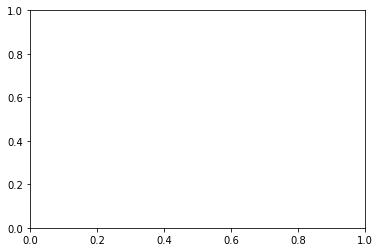

In [22]:
for epoch in range(epoch_num):
    for i in range(int(size / batch_size)):
        label = torch.from_numpy(train_set[i*batch_size: (i+1)*batch_size]).float().to(device) # 把这个batch的训练集扔进gpu
        G_input = torch.randn(batch_size, INPUT_SIZE).to(device) # 噪音扔进GPU
        G_out = G(G_input) # 噪音预测的样本
        # 计算判别器判别的概率
        prob_gen = D(G_out) # 使用判别器判别噪声生成的样本数据   
       
       
        G_loss = - torch.mean(prob_gen).to(device)
        
        
        g_optimizer.zero_grad()
        G_loss.backward()
        g_optimizer.step()
        
        prob_label = D(label) # 使用判别器判别真实数据的真假  
        prob_gen = D(G_out.detach()) # 使用判别器判别噪声生成的样本数据  

        D_loss =  torch.mean(prob_gen - prob_label).to(device)
        
        d_optimizer.zero_grad()
        D_loss.backward(retain_graph=True)
        d_optimizer.step()
        
        for p in D.parameters():
            p.data.clamp_(-CLAMP, CLAMP)

            

        
        print("epoch: %d \t batch: %d \t\t d_loss: %.8f \t g_loss: %.8f "%(epoch+1, i+1, D_loss, G_loss))
        
    g_loss_list.append(G_loss.item())
    d_loss_list.append(D_loss.item())
    
    if (epoch+1) % 5 == 0 :
        cb = test_G()
        plt.savefig('./result/wgan/epoch'+ str(epoch+1))
        cb.remove()
        plt.cla()

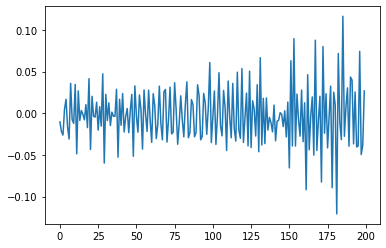

In [23]:
# d_loss曲线
plt.plot(range(len(d_loss_list)),d_loss_list)

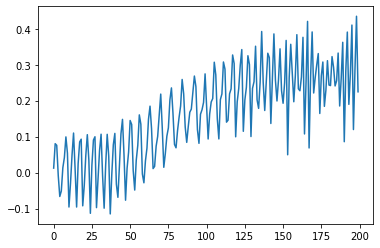

In [24]:
# g_loss曲线
plt.plot(range(len(g_loss_list)),g_loss_list)